<a href="https://colab.research.google.com/github/rosanahjk/testPublico/blob/main/01_Python_claseProfe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**DIPLOMATURA EN DATA SCIENCE PARA LA TOMA DE DECISIONES-Curso de Python**

**2024**

---
# Aplicaciones en Python

Esta notebook tiene como objetivo introducir conceptos básicos de estadística descriptiva y su aplicación en Python. Exploraremos librerías, paquetes y funciones esenciales que facilitarán la manipulación y el procesamiento de datos, ayudándonos a comprender mejor cómo analizar y describir conjuntos de datos.

## Entorno de trabajo

[Utilizaremos lenguaje de Python y Google Colab para analizar un dataset. Colab es un servicio en la nube basado en Notebooks de Jupyter, por lo que no es necesario descargar nada. Exploraremos herramientas de software libre, lo que significa que no se requiere una licencia para utilizarlas.


<center>
<img src="https://i.imgur.com/Cq52LcH.png" height="150" />
</center>





In [1]:
# Importar librerías para manipulación de datos y visualización
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import io


# Configuración de Seaborn para gráficos
sns.set(rc={'figure.figsize':(10,6)})

# Configuración de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)


# Instalación y importación de la librería missingno para visualización de datos faltantes
!pip install -q missingno
import missingno as msno

# Importar KNNImputer para imputación de valores faltantes
from sklearn.impute import KNNImputer

#Para en encoding
from sklearn.preprocessing import LabelEncoder

# Importar librerías para regresión
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Importar librerías para clasificación
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Para calcular el VIF (Factor de Inflación de Varianza)
import statsmodels.api as sm




CAZ

# Dataset Encuesta de Movilidad Domiciliaria 2018 en formato xlsx

Trabajaremos con la  Encuesta de Movilidad Domiciliaria 2018.

Se analizarán los datos provenientes de la siguiente pagina y los dataset personas_ENMODO18 y viajes_ENMOD18.[Link a los datos](https://data.buenosaires.gob.ar/dataset/encuesta-movilidad-domiciliaria)

Nos podemos plantear evaluar
* Determinar cómo influyen diversas características individuales y del viaje en el tipo de viaje realizado mediante un modelo de clasificación
* Analizar cómo diversas características individuales y del viaje influyen en la duración del viaje  mediante un modelo de regresión.

### Subiendo el archivo al entorno de Colaboratory

Por suerte, Colaboratory no tiene acceso a nuestro sistema de archivos local :). Para poder leer un archivo, primero debemos subirlo a la nube " Base Viajes" de la página.

In [ ]:
from google.colab import files
uploaded = files.upload()

En la salida de la celda anterior, verán el texto

```
Saving Personas_ENMODO18.xlsx to Personas_ENMODO18.xlsx
```
El texto XXX seguido de Saving ...será la clave del archivo, . Tener en cuenta que esta clave no necesariamente es el nombre del archivo.


In [ ]:
file_key = 'Personas_ENMODO18.xlsx'  # Replace for corresponding key
df = pd.read_excel(file_key)

Ya hemos creado un DataFrame de pandas en base al archivo de respuestas. Un DataFrame no es más que una tabla sobre la cual podemos aplicar un montón de operaciones similares a las de Excel o a las SQL. En esta notebook no pretendemos hacer un tutorial de pandas, el Internet está lleno de ellos, pero sí explicaremos cómo implementar determinadas operaciones necesarias para el análisis de este conjunto de datos.

Veamos qué valor tiene la variable `df`.

In [ ]:
#visualizamos las primeras 10 filas del conjunto de datos
df[:10]

### Cargar archivos desde una URL en Python de Viajes_ENMODO18 y Personas_ENMODO18

Trabajar con archivos desde una URL en Python es una excelente práctica, especialmente cuando varias personas colaboran en un proyecto.
En github ubicas el archivo seleccionas Raw(clic derecho copiar enlace)

In [2]:
url = 'https://github.com/yiranamejia/DatasetBuenosAires/raw/main/Viajes_ENMODO18.xlsx'
df1_viajes = pd.read_excel(url)
df1_viajes[:5]

,id_hogar,id_persona,id_viaje,VII_2_activida_en_el_origen,VII_3_activida_en_el_destino,BH_NBH,motivo,VII_9_veces_por_semana_viaja,VIII_35_tarifa_combinada,jur_origen,jur_destino,partido_origen_viaje,partido_destino_viaje,cod_partido_origen,cod_partido_destino,hora_inicio,hora_final,duracion_minutos,modo_des,radio_origen,radio_destino,PONDERA,cantidad_etapas,tipo_viaje,menos_2_cuadras,Inluye_bici,viaja_rmba,distancia_viaje_km
0,1,2,1,1,2,BH,2,5,0,6,6,CORONEL BRANDSEN,CORONEL BRANDSEN,6119,6119,10,10.666667,40,5,61191009.0,61191001.0,503,1,PBA,0,no,1,4.387573
1,1,2,2,2,1,BH,2,5,0,6,6,CORONEL BRANDSEN,CORONEL BRANDSEN,6119,6119,17,17.666667,40,5,61191001.0,61191009.0,503,1,PBA,0,no,1,4.387573
2,2,1,1,1,3,BH,3,88,0,6,6,CORONEL BRANDSEN,CORONEL BRANDSEN,6119,6119,9.25,10.25,60,4,61190702.0,61190302.0,464,1,PBA,0,no,1,11.885378
3,2,1,2,3,1,BH,3,88,0,6,6,CORONEL BRANDSEN,CORONEL BRANDSEN,6119,6119,12,13,60,4,61190302.0,61190702.0,464,1,PBA,0,no,1,11.885378
4,3,1,1,1,7,BH,7,88,0,6,6,CORONEL BRANDSEN,CORONEL BRANDSEN,6119,6119,9,12,180,3,61190702.0,61191007.0,462,1,PBA,0,no,1,12.408573


In [3]:
url = 'https://github.com/yiranamejia/DatasetBuenosAires/raw/main/Personas_ENMODO18.xlsx'
df1_personas = pd.read_excel(url)

df1_personas[:5]

,id_hogar,id_persona,partido,nombre_partido,IV_2_edad,IV_4_sexo,IV_6_relacionConJefeDeHogar,IV_7_dificultad,IV_9_cursaActualmente,IV_10_nivel_cursando,IV_11_ambito_cursando,IV_12_nivel_aprobado,Trabaja_Si_No (0=SD),V_4_situacion_laboral,V_5_porque_no_trabajo,V_5b_porque_no_trabajo_otro,V_6_porque_no_tiene_empleo,V_6b_porque_no_tiene_empleo_otro,V_7_trabaja_como,V_8_forma_aporte,V_9_ambito_laboral,V_9b_ambito_laboral_otro,V_10_cobertura,V_11_lugar_atencion,V_12_AM,VI_2_viajo_ayer,VI_3_motivos_no_viajo_ayer,PONDERA
0,1,1,6119,BRANDSEN,59.0,2,1,7,2,0,0,2,2,10,0,0,1,0,0,0,0,0,1,1,2,2,1,187
1,1,2,6119,BRANDSEN,64.0,1,2,7,2,0,0,1,1,1,0,0,0,0,2,1,1,0,1,1,1,1,0,503
2,1,3,6119,BRANDSEN,82.0,2,4,3,2,0,0,1,2,10,0,0,1,0,0,0,0,0,1,1,2,2,1,205
3,2,1,6119,BRANDSEN,25.0,2,1,7,2,0,0,3,2,9,0,0,0,0,0,0,0,0,5,1,2,1,0,464
4,2,2,6119,BRANDSEN,7.0,2,3,7,1,3,1,1,2,10,0,0,2,0,0,0,0,0,5,1,2,2,1,232


Revisamos valores faltantes de los dos dataset, como se desea unificar es conveniente eliminar valores faltantes ?

In [4]:
# Revisión de valores nulos en df1_personas
print("Valores nulos en df1_personas:")
print(df1_personas.isnull().sum())
print("\n")

# Revisión de valores nulos en df1_viajes
print("Valores nulos en df1_viajes:")
print(df1_viajes.isnull().sum())

Valores nulos en df1_personas:
id_hogar                             0
id_persona                           0
partido                              0
nombre_partido                       0
IV_2_edad                           14
IV_4_sexo                            0
IV_6_relacionConJefeDeHogar          0
IV_7_dificultad                      0
IV_9_cursaActualmente                0
IV_10_nivel_cursando                 0
IV_11_ambito_cursando                0
IV_12_nivel_aprobado                 0
Trabaja_Si_No (0=SD)                 0
V_4_situacion_laboral                0
V_5_porque_no_trabajo                0
V_5b_porque_no_trabajo_otro          0
V_6_porque_no_tiene_empleo           0
V_6b_porque_no_tiene_empleo_otro     0
V_7_trabaja_como                     0
V_8_forma_aporte                     0
V_9_ambito_laboral                   0
V_9b_ambito_laboral_otro             0
V_10_cobertura                       0
V_11_lugar_atencion                  0
V_12_AM                          

# Revisamos identificadores para unir los dataset, vemos cuales son los valores unicos de  cada dataset

In [5]:
 # obtenemos lista de valores únicos o un array(matriz) de cada columna, o sea los valores distintos que aparecen en cada columna
for column in df1_personas.columns:
    unique_values = df1_personas[column].unique()
    total_unique = len(unique_values)
    print(f"En la columna '{column}':")
    print(unique_values)
    print(f"Total de valores únicos: {total_unique}\n")

En la columna 'id_hogar':
[    1     2     3 ... 16666 16667 16668]
Total de valores únicos: 16667

En la columna 'id_persona':
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Total de valores únicos: 12

En la columna 'partido':
[6119 6266 6648 6260 6497 6252 6483 6638 6778 6364 6539 6574 6329 6098
 6525 6410 6134 6028 6882 6245 6126 6270 6441 6840 6749 6568 6560 6412
 2007 6408 2010 6532 6427 6035 6658 6371 6434 6490 2003 2009 2014 6760
 2015 6515 2011 2008 6805 2002 2004 2013 2001 6274 2005 6756 2012 2006
 6861 6091]
Total de valores únicos: 58

En la columna 'nombre_partido':
['BRANDSEN' 'EXALTACION DE LA CRUZ' 'PRESIDENTE PERON'
 'ESTEBAN ECHEVERRIA' 'LUJAN' 'ESCOBAR' 'LOBOS' 'PILAR' 'SAN VICENTE'
 'GENERAL RODRIGUEZ' 'MERLO' 'NAVARRO' 'GENERAL LAS HERAS' 'BERISSO'
 'MARCOS PAZ' 'ITUZAINGO' 'CAÑUELAS' 'ALMIRANTE BROWN' 'ZARATE' 'ENSENADA'
 'CAMPANA' 'EZEIZA' 'LA PLATA' 'TRES DE FEBRERO' 'SAN FERNANDO' 'MORON'
 'MORENO' 'JOSE C PAZ' 'COMUNA 7' 'HURLINGHAM' 'COMUNA 10' 'MERCEDES'
 'LA MATANZA

In [ ]:
 # obtenemos lista de valores únicos o un array(matriz) de cada columna, o sea los valores distintos que aparecen en cada columna
for column in df1_viajes.columns:
    unique_values = df1_viajes[column].unique()
    total_unique = len(unique_values)
    print(f"En la columna '{column}':")
    print(unique_values)
    print(f"Total de valores únicos: {total_unique}\n")

En la columna 'id_hogar':
[    1     2     3 ... 16203 16204 16207]
Total de valores únicos: 13900

En la columna 'id_persona':
[ 2  1  3  4  5  6  7 10  8  9 11]
Total de valores únicos: 11

En la columna 'id_viaje':
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Total de valores únicos: 14

En la columna 'VII_2_activida_en_el_origen':
[ 1  2  3  7  9  4 15 13  6 12  8 10 11  5 22 16 17 14]
Total de valores únicos: 18

En la columna 'VII_3_activida_en_el_destino':
[ 2  1  3  7  9  4 15 13  6 12  8  5 10 11 16 22 17 14]
Total de valores únicos: 18

En la columna 'BH_NBH':
['BH' 'NBH']
Total de valores únicos: 2

En la columna 'motivo':
[ 2  3  7  9  4 15 13  6 12  8  5 10 11 22 16 17 14]
Total de valores únicos: 17

En la columna 'VII_9_veces_por_semana_viaja':
[ 5 88  6  3  2  4  1  7  8  9 15]
Total de valores únicos: 11

En la columna 'VIII_35_tarifa_combinada':
[0 2 1]
Total de valores únicos: 3

En la columna 'jur_origen':
[ 6  2 26]
Total de valores únicos: 3

En la columna 'jur_des

De lo valores unicos  de cada dataset , se observa que coinciden en las variables id_hogar y id_personas,  aunque los valores unicos de id_personas del dataset de viajes tiene valores hasta 11 y el dataset de personas hasta 12. Vamos a revisar las diferencias entre los identificadores dadl  los valores unicos de cada dataset

In [ ]:
#Ahora revisamos coincidencia de valores unicos de las variables en comun de  'personas' y 'viajes'

#(set) crea un conjunto llamado personas_id1 que contiene todos los valores únicos de la columna 'id_persona' del DataFrame df1_personas
#Esto es útil si quieres realizar operaciones como comparaciones de conjuntos.

# Extraer los valores únicos de 'id_hogar'
personas_id = set(df1_personas['id_hogar'].unique())
viajes_id = set(df1_viajes['id_hogar'].unique())

# Calcular la diferencia
diferencia_en_personas = personas_id - viajes_id
diferencia_en_viajes = personas_id - personas_id

# Mostrar resultados
print(f"Número de valores únicos de 'id_hogar' en 'personas' que no están en 'viajes': {len(diferencia_en_personas)}")
print(f"Valores únicos de 'id_hogar' en 'personas' que no están en 'viajes': {diferencia_en_personas}")

print(f"Número de valores únicos de 'id_hogar' en 'viajes' que no están en 'personas': {len(diferencia_en_viajes)}")
print(f"Valores únicos de 'id_hogar' en 'viajes' que no están en 'personas': {diferencia_en_viajes}")

# Supongamos que tienes los DataFrames 'personas' y 'viajes'

# Extraer los valores únicos de 'id_persona'
personas_id1 = set(df1_personas['id_persona'].unique())
viajes_id1 = set(df1_viajes['id_persona'].unique())

# Calcular la diferencia
diferencia_en_personas1 = personas_id1 - viajes_id1
diferencia_en_viajes1 = personas_id1 - personas_id1

# Mostrar resultados
print(f"Número de valores únicos de 'id_persona' en 'personas' que no están en 'viajes': {len(diferencia_en_personas1)}")
print(f"Valores únicos de 'id_hogar' en 'personas' que no están en 'viajes': {diferencia_en_personas1}")

print(f"Número de valores únicos de 'id_persona' en 'viajes' que no están en 'personas': {len(diferencia_en_viajes1)}")
print(f"Valores únicos de 'id_hogar' en 'viajes' que no están en 'personas': {diferencia_en_viajes1}")

Número de valores únicos de 'id_hogar' en 'personas' que no están en 'viajes': 2767
Valores únicos de 'id_hogar' en 'personas' que no están en 'viajes': {16384, 16385, 16386, 16387, 16388, 16389, 16390, 16391, 16392, 16284, 16393, 11, 16394, 16395, 14, 15, 16, 16396, 16397, 16398, 16399, 16400, 8214, 16401, 24, 25, 26, 27, 16403, 16404, 16405, 16406, 16407, 16408, 16409, 8227, 36, 37, 8229, 16289, 16415, 41, 42, 16418, 16419, 16420, 16421, 47, 16423, 16424, 16425, 16426, 52, 16428, 16429, 16430, 8248, 16432, 16433, 16434, 16435, 16436, 16437, 16438, 16439, 65, 16441, 16442, 16443, 16444, 16445, 71, 16447, 16448, 16449, 16450, 16451, 77, 16453, 8271, 16298, 16456, 16457, 16458, 16459, 16460, 16461, 16462, 16463, 16464, 90, 16466, 16467, 16468, 16469, 16470, 16471, 16472, 16473, 16474, 8292, 16302, 16477, 16478, 16479, 16303, 16481, 16482, 16483, 16484, 16485, 16486, 16487, 16488, 114, 16490, 116, 117, 16493, 16494, 16495, 16496, 16497, 16498, 16499, 16500, 16501, 8319, 16503, 129, 16505

# Se unen dataset de Viajes y Personas que tienen identificadores en común (id_hogar,id_persona)

In [ ]:
# La función pd.merge() se utiliza para combinar dos DataFrames en uno solo, basado en las columnas que tienen en común.
# El parámetro "on" se usa para indicar las columnas clave que se utilizarán para la combinación.
# El parámetro how='inner' especifica que se realizará una combinación interna (inner join),
# lo que significa que el resultado incluirá solo las filas donde los valores coincidan en ambos DataFrames.

# Unir DataFrames por las columnas en comun 'id_hogar' e 'id_persona'
df_unido = pd.merge(df1_personas, df1_viajes, on=['id_hogar', 'id_persona'], how='inner')
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59452 entries, 0 to 59451
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id_hogar                          59452 non-null  int64  
 1   id_persona                        59452 non-null  int64  
 2   partido                           59452 non-null  int64  
 3   nombre_partido                    59452 non-null  object 
 4   IV_2_edad                         59452 non-null  float64
 5   IV_4_sexo                         59452 non-null  int64  
 6   IV_6_relacionConJefeDeHogar       59452 non-null  int64  
 7   IV_7_dificultad                   59452 non-null  object 
 8   IV_9_cursaActualmente             59452 non-null  int64  
 9   IV_10_nivel_cursando              59452 non-null  int64  
 10  IV_11_ambito_cursando             59452 non-null  int64  
 11  IV_12_nivel_aprobado              59452 non-null  int64  
 12  Trab

In [ ]:
# head() muestra las primeras 5 filas del DF unido
df_unido.head()

,id_hogar,id_persona,partido,nombre_partido,IV_2_edad,IV_4_sexo,IV_6_relacionConJefeDeHogar,IV_7_dificultad,IV_9_cursaActualmente,IV_10_nivel_cursando,IV_11_ambito_cursando,IV_12_nivel_aprobado,Trabaja_Si_No (0=SD),V_4_situacion_laboral,V_5_porque_no_trabajo,V_5b_porque_no_trabajo_otro,V_6_porque_no_tiene_empleo,V_6b_porque_no_tiene_empleo_otro,V_7_trabaja_como,V_8_forma_aporte,V_9_ambito_laboral,V_9b_ambito_laboral_otro,V_10_cobertura,V_11_lugar_atencion,V_12_AM,VI_2_viajo_ayer,VI_3_motivos_no_viajo_ayer,PONDERA_x,id_viaje,VII_2_activida_en_el_origen,VII_3_activida_en_el_destino,BH_NBH,motivo,VII_9_veces_por_semana_viaja,VIII_35_tarifa_combinada,jur_origen,jur_destino,partido_origen_viaje,partido_destino_viaje,cod_partido_origen,cod_partido_destino,hora_inicio,hora_final,duracion_minutos,modo_des,radio_origen,radio_destino,PONDERA_y,cantidad_etapas,tipo_viaje,menos_2_cuadras,Inluye_bici,viaja_rmba,distancia_viaje_km
0,1,2,6119,BRANDSEN,64.0,1,2,7,2,0,0,1,1,1,0,0,0,0,2,1,1,0,1,1,1,1,0,503,1,1,2,BH,2,5,0,6,6,CORONEL BRANDSEN,CORONEL BRANDSEN,6119,6119,10,10.666667,40,5,61191009.0,61191001.0,503,1,PBA,0,no,1,4.387573
1,1,2,6119,BRANDSEN,64.0,1,2,7,2,0,0,1,1,1,0,0,0,0,2,1,1,0,1,1,1,1,0,503,2,2,1,BH,2,5,0,6,6,CORONEL BRANDSEN,CORONEL BRANDSEN,6119,6119,17,17.666667,40,5,61191001.0,61191009.0,503,1,PBA,0,no,1,4.387573
2,2,1,6119,BRANDSEN,25.0,2,1,7,2,0,0,3,2,9,0,0,0,0,0,0,0,0,5,1,2,1,0,464,1,1,3,BH,3,88,0,6,6,CORONEL BRANDSEN,CORONEL BRANDSEN,6119,6119,9.25,10.25,60,4,61190702.0,61190302.0,464,1,PBA,0,no,1,11.885378
3,2,1,6119,BRANDSEN,25.0,2,1,7,2,0,0,3,2,9,0,0,0,0,0,0,0,0,5,1,2,1,0,464,2,3,1,BH,3,88,0,6,6,CORONEL BRANDSEN,CORONEL BRANDSEN,6119,6119,12,13,60,4,61190302.0,61190702.0,464,1,PBA,0,no,1,11.885378
4,3,1,6119,BRANDSEN,59.0,1,1,7,2,0,0,2,2,10,0,0,7,0,0,0,0,0,1,4,2,1,0,462,1,1,7,BH,7,88,0,6,6,CORONEL BRANDSEN,CORONEL BRANDSEN,6119,6119,9,12,180,3,61190702.0,61191007.0,462,1,PBA,0,no,1,12.408573


# Exploracion y preprocesamiento

In [ ]:
# @title
# Revisión de valores nulos en df_unido con la función isnull().sum()
# La función isnull() identifica los valores nulos en el DataFrame,
# y la función sum() cuenta la cantidad de valores nulos por cada columna.
print("Valores nulos en df1_personas:")
print(df_unido.isnull().sum())
print("\n")


#comentarios: Solo dos culumnas estan presentando valores nulos

Valores nulos en df1_personas:
id_hogar                              0
id_persona                            0
partido                               0
nombre_partido                        0
IV_2_edad                             0
IV_4_sexo                             0
IV_6_relacionConJefeDeHogar           0
IV_7_dificultad                       0
IV_9_cursaActualmente                 0
IV_10_nivel_cursando                  0
IV_11_ambito_cursando                 0
IV_12_nivel_aprobado                  0
Trabaja_Si_No (0=SD)                  0
V_4_situacion_laboral                 0
V_5_porque_no_trabajo                 0
V_5b_porque_no_trabajo_otro           0
V_6_porque_no_tiene_empleo            0
V_6b_porque_no_tiene_empleo_otro      0
V_7_trabaja_como                      0
V_8_forma_aporte                      0
V_9_ambito_laboral                    0
V_9b_ambito_laboral_otro              0
V_10_cobertura                        0
V_11_lugar_atencion                   0
V_12_AM  

## Seleccionando atributos de interes
Veamos las variables del dataset ,  algunas consideradas de mayor relevancia. Según:

* variables Demográficas:

IV_2_edad, IV_4_sexo, IV_6_relacionConJefeDeHogar

* Situación

V_4_situacion_laboral, Trabaja_Si_No , V_5_porque_no_trabajo, V_7_trabaja_como, IV_10_nivel_cursando

* Características del Viaje:

Tipo_viaje, VII_2_activida_en_el_origen, VII_3_activida_en_el_destino
radio_origen, radio_destino, duracion_minutos, distancia_viaje_km

Renombramos las columnas de interés

In [ ]:
# @title
#Renombramos columnas
# Crear un diccionario de mapeo para los nuevos nombres de columnas, contiene las columnas actuales como claves y los nuevos nombres como valores
new_column_names = {
    'IV_2_edad': 'Edad',
    'IV_4_sexo': 'Sexo',
    'IV_6_relacionConJefeDeHogar': 'Relacion_Jefe_Hogar',
    'IV_10_nivel_cursando':'Nivel_cursa',
    'V_4_situacion_laboral': 'Situacion_Laboral',
    'Trabaja_Si_No (0=SD)': 'Trabaja',
    'V_5_porque_no_trabajo': 'Porque_No_Trabajo',
    'V_7_trabaja_como': 'Trabaja_Como',
    'VII_2_activida_en_el_origen': 'Actividad_Origen',
    'VII_3_activida_en_el_destino': 'Actividad_Destino'
}
# La función `rename()` en pandas se utiliza para cambiar los nombres de las columnas o índices en un DF.
df_unido.rename(columns=new_column_names, inplace=True)

# Verificar los nuevos nombres
print(df_unido.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59452 entries, 0 to 59451
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id_hogar                          59452 non-null  int64  
 1   id_persona                        59452 non-null  int64  
 2   partido                           59452 non-null  int64  
 3   nombre_partido                    59452 non-null  object 
 4   Edad                              59452 non-null  float64
 5   Sexo                              59452 non-null  int64  
 6   Relacion_Jefe_Hogar               59452 non-null  int64  
 7   IV_7_dificultad                   59452 non-null  object 
 8   IV_9_cursaActualmente             59452 non-null  int64  
 9   Nivel_cursa                       59452 non-null  int64  
 10  IV_11_ambito_cursando             59452 non-null  int64  
 11  IV_12_nivel_aprobado              59452 non-null  int64  
 12  Trab

la etiqueta non-null indica que el número de valores no nulos en una columna es igual al número total de entradas en el DataFrame para esa columna. Esto significa que no hay valores faltantes en esa columna, no sería tann confiable porque ya habiamos revisado previamente y surgieron faltantes en radio_origen y radio_destino

# Listamos las columnas relevantes

ALL estar interesados en

In [ ]:
# @title
#Del df_unido hacemos una selección, listamos las columnas de interes
columns_relevant = [
    'Edad', 'Sexo', 'Relacion_Jefe_Hogar','Nivel_cursa',
    'Situacion_Laboral', 'Trabaja', 'Porque_No_Trabajo', 'Trabaja_Como',
    'tipo_viaje', 'Actividad_Origen', 'Actividad_Destino',
    'radio_origen', 'radio_destino', 'duracion_minutos','modo_des','distancia_viaje_km']

# Crear el nuevo DataFrame con las columnas seleccionadas
df_relevant = df_unido[columns_relevant]

# Verificar el nuevo DataFrame
df_relevant.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59452 entries, 0 to 59451
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Edad                 59452 non-null  float64
 1   Sexo                 59452 non-null  int64  
 2   Relacion_Jefe_Hogar  59452 non-null  int64  
 3   Nivel_cursa          59452 non-null  int64  
 4   Situacion_Laboral    59452 non-null  int64  
 5   Trabaja              59452 non-null  int64  
 6   Porque_No_Trabajo    59452 non-null  int64  
 7   Trabaja_Como         59452 non-null  int64  
 8   tipo_viaje           59452 non-null  object 
 9   Actividad_Origen     59452 non-null  int64  
 10  Actividad_Destino    59452 non-null  int64  
 11  radio_origen         59190 non-null  float64
 12  radio_destino        59016 non-null  float64
 13  duracion_minutos     59452 non-null  object 
 14  modo_des             59452 non-null  int64  
 15  distancia_viaje_km   59452 non-null 

In [ ]:
# @title
 # obtenemos lista de valores únicos o un array(matriz) de cada columna, o sea los valores distintos que aparecen en cada columna
for column in df_relevant.columns:
    unique_values = df_relevant[column].unique()
    total_unique = len(unique_values)
    print(f"En la columna '{column}':")
    print(unique_values)
    print(f"Total de valores únicos: {total_unique}\n")

En la columna 'Edad':
[64. 25. 59. 46. 14. 28. 26. 47. 15. 11.  9. 38. 10.  7. 54. 61. 85. 34.
 44. 12.  6. 40. 24. 21. 55.  4. 53. 32. 18. 43. 45. 13. 31.  3.  5. 20.
 17. 41. 58. 67. 42. 37. 16. 69. 49. 27. 35. 48. 30.  8. 73. 50. 65. 52.
 51. 57. 66. 33. 39. 36. 19.  2.  1. 74. 23. 62. 22. 72. 75. 60. 56. 29.
 71. 63. 86. 76. 68. 79. 78. 70.  0. 89. 80. 84. 81. 88. 82. 83. 77. 87.
 94. 93. 90. 96. 92. 91. 95. 97. 99.]
Total de valores únicos: 99

En la columna 'Sexo':
[1 2]
Total de valores únicos: 2

En la columna 'Relacion_Jefe_Hogar':
[2 1 3 8 4 7 6 5]
Total de valores únicos: 8

En la columna 'Nivel_cursa':
[ 0  4  3  6  2  5  9 22  1  8  7]
Total de valores únicos: 11

En la columna 'Situacion_Laboral':
[ 1  9 10  2  3  6  0  8  4  5  7]
Total de valores únicos: 11

En la columna 'Trabaja':
[1 2 0]
Total de valores únicos: 3

En la columna 'Porque_No_Trabajo':
[ 0  2  1  5 22  4  6  3  7]
Total de valores únicos: 9

En la columna 'Trabaja_Como':
[2 0 4 1 3]
Total de valores úni

**Realizamos conversion de tipos de datos**
Y surgen ahora mas faltantes


In [ ]:
# @title
# Convertir 'duracion_minutos' y 'distancia_viaje_km' a float

#Convierte los valores de la columna seleccionada a un tipo de dato numérico (como int o float).errors='coerce' si se encuentra un valor que no puede convertirse a un número se convertirá en NaN
#errors='coerce' es un parámetro que especifica cómo manejar los errores durante la conversión:
df_relevant.loc[:, 'duracion_minutos'] = pd.to_numeric(df_relevant['duracion_minutos'], errors='coerce')
df_relevant.loc[:, 'distancia_viaje_km'] = pd.to_numeric(df_relevant['distancia_viaje_km'], errors='coerce')


**Renombrando** valores en las columnas modo_des y  Relacion_Jefe_Hogar

In [ ]:
# @title
#Verificamos los valores en modo_des
print(df_relevant['modo_des'].unique())

[5 4 3 2 6 1 8 9 7]


In [ ]:
# @title
#Cambio nombres de los nivel de la columna modo_des
# Crear un diccionario de mapeo para los valores descriptivos
modo_des_map = {
    1: 'Una etapa en bicicleta',
    2: 'Una etapa a pie',
    3: 'Una etapa en taxi o remis',
    4: 'Una etapa en transporte público (colectivo, tren o subte/premetro)',
    5: 'Una etapa en automovil particular o moto/ciclomotor (conductor o acompañante)',
    6: 'Una etapa charter/combi, bus de la empresa o transporte escolar',
    7: 'Dos o más etapas combinando transporte público (colectivo, tren y/o subte/premetro) y otro modo',
    8: 'Dos o más etapas en transporte público (colectivo, tren y/o subte/premetro)',
    9: 'Otros modo o dos o más etapas combinando modos que excluyen el transporte público (colectivo, tren y/o subte/premetro)'
}

# Reemplazar los valores en la columna 'modo_des' usando el diccionario de mapeo
df_relevant['modo_des'] = df_relevant['modo_des'].map(modo_des_map)

# Verificar los cambios
print(df_relevant[['modo_des']].head())


                                            modo_des
0  Una etapa en automovil particular o moto/ciclo...
1  Una etapa en automovil particular o moto/ciclo...
2  Una etapa en transporte público (colectivo, tr...
3  Una etapa en transporte público (colectivo, tr...
4                          Una etapa en taxi o remis


<ipython-input-16-0e7e7917a755>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['modo_des'] = df_relevant['modo_des'].map(modo_des_map)


In [ ]:
# @title
#Verificamos valores únicos en Relacion_Jefe_Hogar
print(df_relevant['Relacion_Jefe_Hogar'].unique())

[2 1 3 8 4 7 6 5]


In [ ]:
# @title
# Crear un diccionario de mapeo para los valores descriptivos Relacion_Jefe_Hogar
relacion_map = {
    1: 'Jefe/a de hogar',
    2: 'Esposo/a o compañero/a',
    3: 'Hijo/a o Hijastro/a',
    4: 'Otro pariente',
    5: 'Empleado domestico/a',
    6: 'Pensionista huesped o visitante',
    7: 'Otro NO pariente',
    8: 'Madre/ Padres'
}

#realizamos mapeo en columna
df_relevant.loc[:, 'Relacion_Jefe_Hogar'] = df_relevant['Relacion_Jefe_Hogar'].map(relacion_map)




In [ ]:
# @title
#Verificamos valores únicos en Sexo
print(df_relevant['Sexo'].unique())

[1 2]


In [ ]:
# @title
# Crear un diccionario de mapeo para los valores descriptivos Relacion_Jefe_Hogar
relacion_map = {
    1: 'Hombre',
    2: 'Mujer'
}

#realizamos mapeo en columna
df_relevant.loc[:, 'Sexo'] = df_relevant['Sexo'].map(relacion_map)

# Revisamos los valores nulo, despues de convertir columnas que estaban como tipo object a númerico pueden surgir más

In [ ]:
# @title
# Revisión de valores nulos en df_relevant
print("Valores nulos en df1_personas:")
print(df_relevant.isnull().sum())
print("\n")
df_relevant.info()

#despues de convertir "distancia_viaje_km " Y "duracion_minutos" aparecieron  NaN

Valores nulos en df1_personas:
Edad                      0
Sexo                      0
Relacion_Jefe_Hogar       0
Nivel_cursa               0
Situacion_Laboral         0
Trabaja                   0
Porque_No_Trabajo         0
Trabaja_Como              0
tipo_viaje                0
Actividad_Origen          0
Actividad_Destino         0
radio_origen            262
radio_destino           436
duracion_minutos         69
modo_des                  0
distancia_viaje_km     1068
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59452 entries, 0 to 59451
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Edad                 59452 non-null  float64
 1   Sexo                 59452 non-null  object 
 2   Relacion_Jefe_Hogar  59452 non-null  object 
 3   Nivel_cursa          59452 non-null  int64  
 4   Situacion_Laboral    59452 non-null  int64  
 5   Trabaja              59452 non-null  int64

# Realicemos un análisis descriptivo

In [ ]:
# @title
df_unido.describe()

,id_hogar,id_persona,partido,Edad,Sexo,Relacion_Jefe_Hogar,IV_9_cursaActualmente,Nivel_cursa,IV_11_ambito_cursando,IV_12_nivel_aprobado,Trabaja,Situacion_Laboral,Porque_No_Trabajo,V_6_porque_no_tiene_empleo,Trabaja_Como,V_8_forma_aporte,V_9_ambito_laboral,V_10_cobertura,V_11_lugar_atencion,V_12_AM,VI_2_viajo_ayer,VI_3_motivos_no_viajo_ayer,PONDERA_x,id_viaje,Actividad_Origen,Actividad_Destino,motivo,VII_9_veces_por_semana_viaja,VIII_35_tarifa_combinada,jur_origen,jur_destino,cod_partido_origen,cod_partido_destino,modo_des,radio_origen,radio_destino,PONDERA_y,cantidad_etapas,menos_2_cuadras,viaja_rmba
count,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.00000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.0,59452.0,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,59452.000000,5.919000e+04,5.901600e+04,59452.000000,59452.000000,59452.000000,59452.000000
mean,7427.018183,1.971809,5684.743760,36.821167,1.538468,2.046659,1.665158,1.379836,0.500488,2.558871,1.54703,5.856523,0.034852,1.992195,0.773044,0.797803,1.018250,2.395361,1.647413,1.699354,1.0,0.0,513.118617,1.779318,3.962440,3.991523,6.725358,22.065364,0.543682,5.175335,5.175066,5535.748335,5535.835313,3.776441,5.536367e+07,5.539469e+07,513.118617,1.098550,0.203711,1.000942
std,4563.558298,1.263628,1687.965977,21.246619,0.498522,1.287769,0.471939,2.346140,1.213462,1.225050,0.50008,4.421476,0.732947,4.007756,0.949275,1.104065,1.998263,1.816793,0.927971,0.462560,0.0,0.0,248.347035,0.966136,4.439822,4.449538,4.677271,34.243446,0.881592,1.620712,1.618414,1810.370710,1808.528273,1.785817,1.807997e+07,1.806124e+07,248.347035,0.366133,3.371339,0.030677
min,1.000000,1.000000,2001.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,33.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,2.000000,2.000000,2001.000000,2001.000000,1.000000,2.001010e+07,2.001010e+07,33.000000,1.000000,0.000000,1.000000
25%,3494.000000,1.000000,6091.000000,18.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,0.0,363.000000,1.000000,1.000000,1.000000,3.000000,5.000000,0.000000,6.000000,6.000000,6035.000000,6035.000000,2.000000,6.035071e+07,6.035081e+07,363.000000,1.000000,0.000000,1.000000
50%,7127.500000,2.000000,6427.000000,35.000000,2.000000,2.000000,2.000000,0.000000,0.000000,3.000000,2.00000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.0,0.0,463.000000,2.000000,2.000000,2.000000,4.000000,5.000000,0.000000,6.000000,6.000000,6427.000000,6427.000000,4.000000,6.427511e+07,6.427540e+07,463.000000,1.000000,0.000000,1.000000
75%,11303.000000,3.000000,6539.000000,53.000000,2.000000,3.000000,2.000000,3.000000,1.000000,3.000000,2.00000,10.000000,0.000000,2.000000,2.000000,1.000000,2.000000,5.000000,2.000000,2.000000,1.0,0.0,593.000000,2.000000,6.000000,6.000000,9.000000,6.000000,2.000000,6.000000,6.000000,6539.000000,6539.000000,5.000000,6.539170e+07,6.539172e+07,593.000000,1.000000,0.000000,1.000000
max,16207.000000,11.000000,6882.000000,99.000000,2.000000,8.000000,2.000000,22.000000,22.000000,22.000000,2.00000,10.000000,22.000000,22.000000,4.000000,4.000000,22.000000,5.000000,22.000000,2.000000,1.0,0.0,3644.000000,14.000000,22.000000,22.000000,22.000000,88.000000,2.000000,26.000000,6.000000,26077.000000,6882.000000,9.000000,6.882180e+07,6.882180e+07,3644.000000,6.000000,88.000000,2.000000


Algunas variables son categoricas entonces no tiene sentido un promedio, desviación ...por ejemplo el atributo Sexo. **Ahora vamos con un análisis descriptivo** para las variables numericas continuas.


In [ ]:
# @title

df_relevant['duracion_minutos'] = pd.to_numeric(df_relevant['duracion_minutos'], errors='coerce')
df_relevant['distancia_viaje_km'] = pd.to_numeric(df_relevant['distancia_viaje_km'], errors='coerce')
# Omitir filas con valores nulos en las columnas continuas seleccionadas
df_continuous = df_relevant[['Edad', 'radio_origen', 'radio_destino', 'duracion_minutos', 'distancia_viaje_km']].dropna()
df_continuous.describe()



<ipython-input-23-eff474605815>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['duracion_minutos'] = pd.to_numeric(df_relevant['duracion_minutos'], errors='coerce')
<ipython-input-23-eff474605815>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['distancia_viaje_km'] = pd.to_numeric(df_relevant['distancia_viaje_km'], errors='coerce')


,Edad,radio_origen,radio_destino,duracion_minutos,distancia_viaje_km
count,58319.000000,5.831900e+04,5.831900e+04,58319.000000,58319.000000
mean,36.769561,5.534458e+07,5.536971e+07,31.284367,5.235217
std,21.250558,1.809421e+07,1.808061e+07,30.790369,9.379238
min,0.000000,2.001010e+07,2.001010e+07,0.000000,0.000032
25%,18.000000,6.035061e+07,6.035071e+07,10.000000,0.749546
50%,35.000000,6.427511e+07,6.427531e+07,20.000000,2.077477
75%,53.000000,6.539171e+07,6.539172e+07,40.000000,5.526519
max,99.000000,6.882180e+07,6.882180e+07,1050.000000,384.229996


duracion_minutos:La mayoría de los viajes duran alrededor de 31 minutos.
El viaje más largo: Puede llegar hasta 1,050 minutos, lo que es muy largo.
El viaje más corto: Algunos viajes son de 0 minutos, posiblemente por errores o datos incompletos.La mitad de los viajes duran menos de 20 minutos.El 75% de los viajes: Duran 40 minutos o menos.


distancia_viaje_km:Promedio: La mayoría de los viajes cubren unos 5.24 kilómetros.
La distancia más larga: Los viajes pueden llegar hasta 384 kilómetros, que es una distancia muy larga.
La distancia más corta: Algunos viajes son de solo 0.000032 kilómetros, lo cual podría ser un error o una medida muy pequeña.La mitad de los viajes tienen una distancia de 2.08 kilómetros o menos.75% de los viajes: Cubren 5.53 kilómetros o menos.

<ipython-input-24-098da1ecf575>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


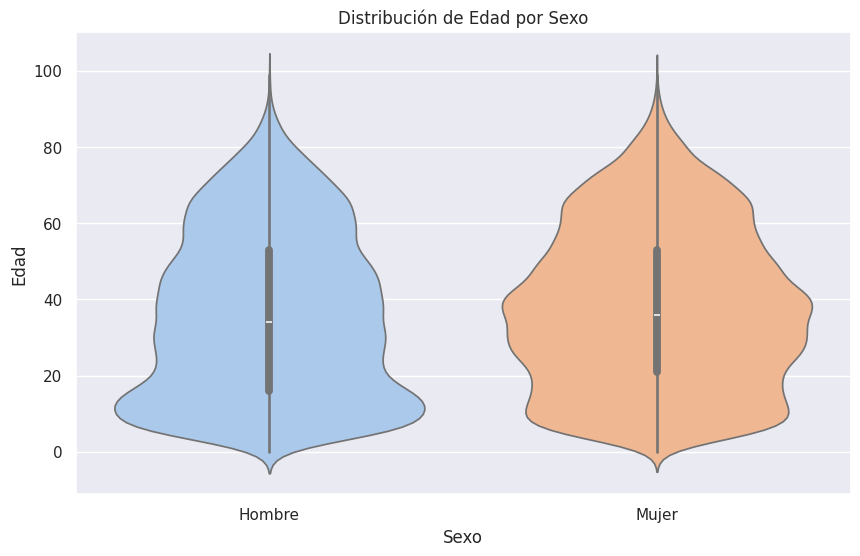

In [ ]:
# @title
#Diagrama de edad por sexo

# Crear el diagrama de violín
plt.figure(figsize=(10, 6))
sns.violinplot(
    x=df_relevant['Sexo'],  # Mapear etiquetas en el gráfico
    y=df_relevant['Edad'],
    palette='pastel'
)
plt.title('Distribución de Edad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()
# Verificar el tipo de datos en 'Sexo'


Se aprecia que la mediana de los hombres y las mujeres es muy parecida. El rango intercuartil es mayor para los hombres lo que indica que hay una mayor dispersión en las edades de los hombres.

 **Histograma de frecuencias de la edad de hombres y mujeres**

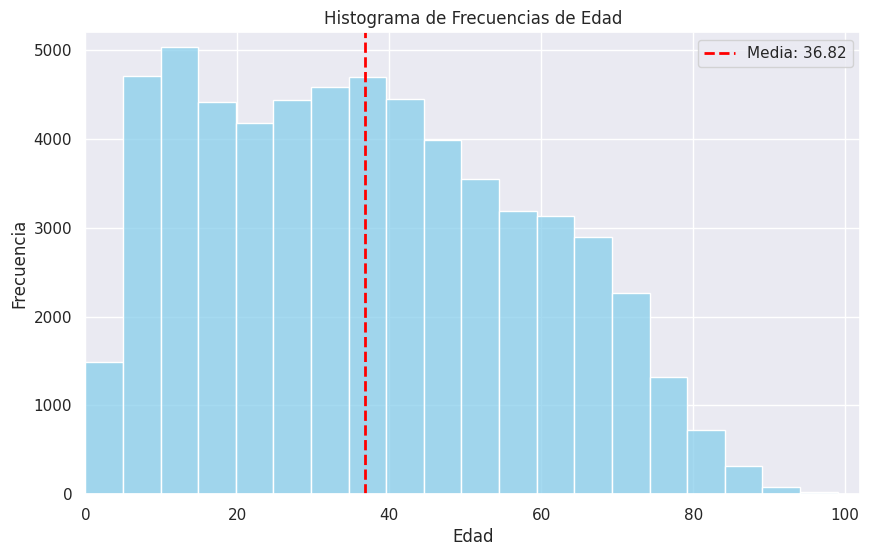

count    59452.000000
mean        36.821167
std         21.246619
min          0.000000
25%         18.000000
50%         35.000000
75%         53.000000
max         99.000000
Name: Edad, dtype: float64


In [ ]:
# @title
# Calcular la media de la columna 'IV_2_edad'
media_edad = df_relevant['Edad'].mean()

# Crear el histograma con la media marcada
plt.figure(figsize=(10, 6))
sns.histplot( df_relevant['Edad'], bins=20, kde=False, color='skyblue')

# Agregar una línea vertical para marcar la media
plt.axvline(media_edad, color='red', linestyle='--', linewidth=2, label=f'Media: {media_edad:.2f}')

# Configuración del gráfico
plt.title('Histograma de Frecuencias de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.xlim(0, 102)  # Ajustar el límite del eje x según el rango de edad
plt.ylim(0, 5200)  # Ajustar el límite del eje y según el rango de frecuencias
plt.legend()  # Mostrar la leyenda

# Mostrar el gráfico
plt.show()

# Ver los estadísticos de la variable 'Edad'
estadisticos_edad = df_relevant['Edad'].describe()
print(estadisticos_edad)

Un promedio de edad de 36.82 ,
con una desviación estándar de 21.25, lo que indica una dispersión significativa en los datos. El valor mínimo es 0, y el máximo es 99. Los cuartiles muestran que el 25% de los valores son menores o iguales a 18, el 50% (mediana) es de 35, y el 75% es de 53. Esto sugiere que la mayoría de los valores están concentrados entre 18 y 53 años.

Revisamos edades particulares

In [ ]:
# @title
# Filtrar el DataFrame para obtener las filas donde 'Edad' está entre 0 y 5 años
filtered_edad = df_relevant[(df_relevant['Edad'] >= 0) & (df_relevant['Edad'] < 5)]

# Contar el número de filas en el DataFrame filtrado
count_edad = filtered_edad.shape[0]

# Mostrar el resultado
print(f"Número de registros con 'Edad' entre 0 y 5 años: {count_edad}")

Número de registros con 'Edad' entre 0 y 5 años: 1494


In [ ]:
# @title
# Filtrar el DataFrame para obtener las filas donde 'Edad' está entre 0 y 5 años
filtered_edad1 = df_relevant[(df_relevant['Edad'] >= 11) & (df_relevant['Edad'] < 16)]

# Contar el número de filas en el DataFrame filtrado
count_edad1 = filtered_edad1.shape[0]

# Mostrar el resultado
print(f"Número de registros con 'Edad' entre 11 y 15 años: {count_edad1}")

Número de registros con 'Edad' entre 11 y 15 años: 4947


Entre los 11 y 15 años se presenta una mayor concentracion de personas

# Limpieza de dataset y curación de datos
Filtrar datos atipicos
Revisamos que las personas que tengan entre  0 y 5 años su condicion de Trabaja,tendriamos que ampliar el rango de edad para esto considerando que los menores de edad no trabaja.

Revisamos la columna Trabaja filtramos si la respuesta es 0, pues no corresponde con las respuestas.

En relación a la distiancia en km excluimos los valores menores a 0.05
```



In [ ]:
# @title
#  Contar las filas donde Trabaja es igual a "No"
count_trabaja_no = df_relevant[df_relevant['Trabaja'] == 0].shape[0]

#  Contar el total de filas en el DataFrame original
total_filas = df_relevant.shape[0]

#  Calcular el porcentaje
porcentaje = (count_trabaja_no / total_filas) * 100
print("Número de filas donde Trabaja = 0:", count_trabaja_no)
print("Total de filas en el DataFrame:", total_filas)
print("Porcentaje de filas donde Trabaja = 'No': {:.2f}%".format(porcentaje))


Número de filas donde Trabaja = 0: 68
Total de filas en el DataFrame: 59452
Porcentaje de filas donde Trabaja = 'No': 0.11%


In [ ]:
# @title
# Contar las filas donde edad es 0 y Trabaja es "2"
count_edad_0_trabaja_1 = df_relevant[(df_relevant['Edad'] < 8) & (df_relevant['Trabaja'] == 1)].shape[0]

# Contar el total de filas en el DataFrame original
total_filas = df_relevant.shape[0]

# Calcular el porcentaje
porcentaje = (count_edad_0_trabaja_1 / total_filas) * 100

print("Número de filas donde Edad = 0 y Trabaja = 1:", count_edad_0_trabaja_1)
print("Total de filas en el DataFrame:", total_filas)
print("Porcentaje de filas donde Edad = 0 y Trabaja = '1': {:.2f}%".format(porcentaje))

Número de filas donde Edad = 0 y Trabaja = 1: 32
Total de filas en el DataFrame: 59452
Porcentaje de filas donde Edad = 0 y Trabaja = '1': 0.05%


In [ ]:
# @title
# Filtrar el DataFrame para obtener las filas donde 'distancia_viaje_km' es menor a 0.01
filtered_distancia = df_relevant[df_relevant['distancia_viaje_km'] < 0.01]

# Contar el número de filas que cumplen con la condición
count_distancia = filtered_distancia.shape[0]

# Calcular el porcentaje
porcentaje = (count_distancia/ total_filas) * 100

# Mostrar el resultado
print(f"Número de viajes con una distancia menor a 0.01 km: {count_distancia}")
print("Porcentaje de filas donde Edad = 0 y Trabaja = '1': {:.2f}%".format(porcentaje))

Número de viajes con una distancia menor a 0.01 km: 175
Porcentaje de filas donde Edad = 0 y Trabaja = '1': 0.29%


In [ ]:
# @title
# Excluir los datos basados en las condiciones anteriores
# Filas a excluir: (Trabaja = 'No') y (Edad < 8 y Trabaja = 'Sí') y (distancia_viaje_km < 0.01)
excluded_data = df_relevant[
    (df_relevant['Trabaja'] == 0) |
    ((df_relevant['Edad'] < 8) & (df_relevant['Trabaja'] == 1)) |
    (df_relevant['distancia_viaje_km'] < 0.01)
]

# 11. Generar nuevo DataFrame excluyendo los datos
df_filtered = df_relevant[~df_relevant.index.isin(excluded_data.index)]

# Mostrar el DataFrame resultante después de excluir los datos
print("DataFrame después de excluir los datos:")
df_filtered.shape


DataFrame después de excluir los datos:


(59177, 16)

# **Filtrar datos** fuera del rango intercuartílico para duracion en minutos

In [ ]:
# @title
# Calcular los percentiles del 2% y el 98%
percentile_2 = df_filtered['duracion_minutos'].quantile(0.02)
percentile_98 = df_filtered['duracion_minutos'].quantile(0.98)

# Filtrar los datos para que estén dentro del rango deseado
df_filtrado = df_filtered[(df_filtered['duracion_minutos'] >= percentile_2) &
                            (df_filtered['duracion_minutos'] <= percentile_98)]

# Mostrar la descripción de los datos filtrados
df_filtrado.isnull().sum()

,0
Edad,0
Sexo,0
Relacion_Jefe_Hogar,0
Nivel_cursa,0
Situacion_Laboral,0
Trabaja,0
Porque_No_Trabajo,0
Trabaja_Como,0
tipo_viaje,0
Actividad_Origen,0


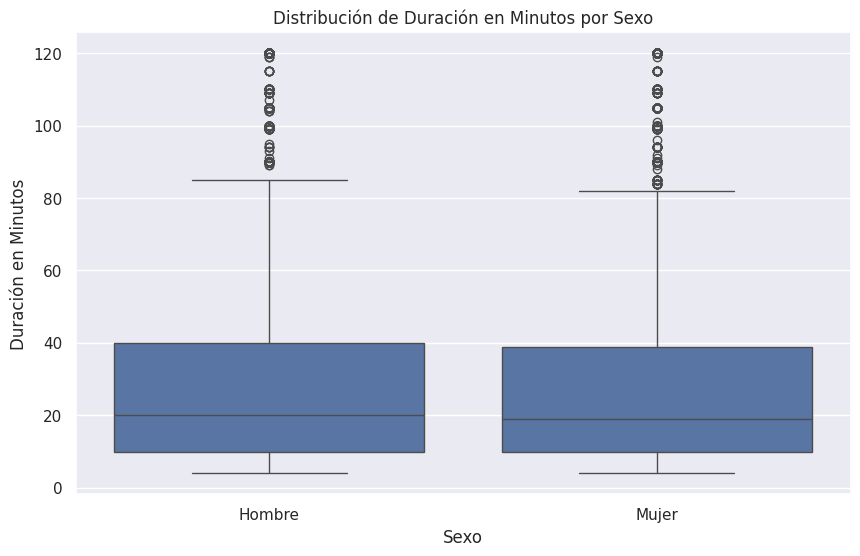

In [ ]:
# @title
# Crear el box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sexo', y='duracion_minutos', data=df_filtrado)

# Personalizar el gráfico
plt.title('Distribución de Duración en Minutos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Duración en Minutos')

# Mostrar el gráfico
plt.show()

**Continuamos** con la visualización Modo de desplazamiento

<ipython-input-34-af21f0ccbef5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modo de Desplazamiento', y='Frecuencia', data=frecuencias_df, palette='viridis')


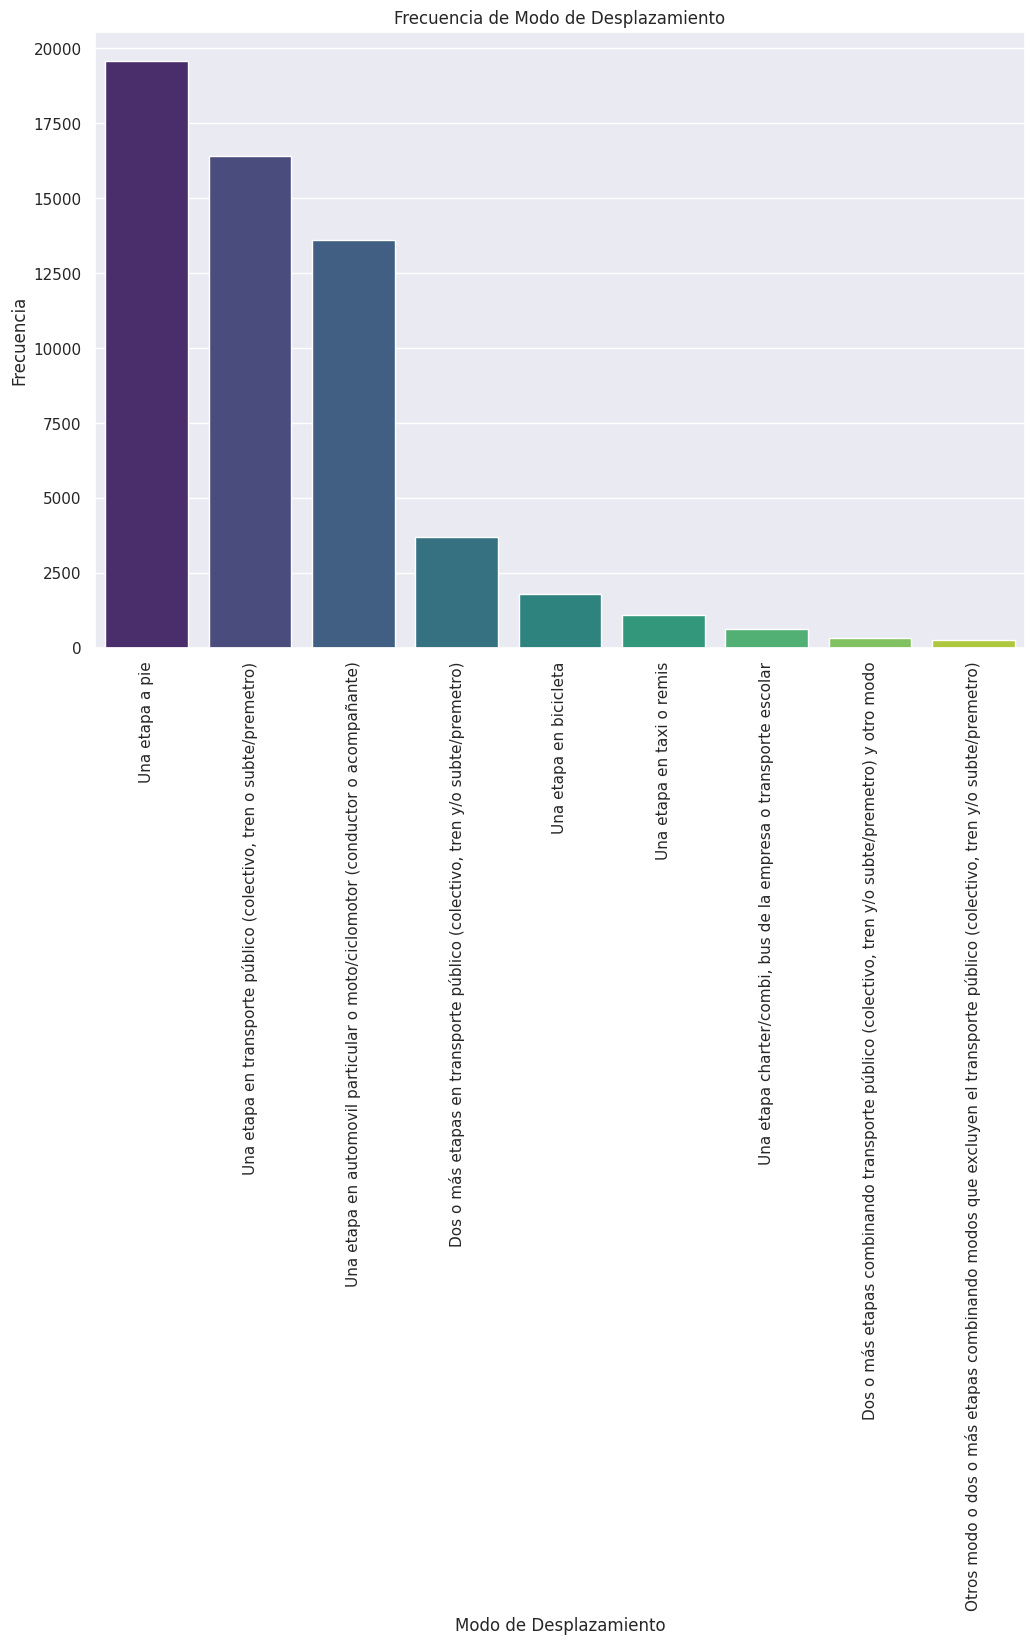

In [ ]:
# @title
# Crear la tabla de frecuencias
frecuencias_df = df_filtrado['modo_des'].value_counts().reset_index()
frecuencias_df.columns = ['Modo de Desplazamiento', 'Frecuencia']

# Graficar las frecuencias
plt.figure(figsize=(12, 8))
sns.barplot(x='Modo de Desplazamiento', y='Frecuencia', data=frecuencias_df, palette='viridis')

# Configuración del gráfico
plt.title('Frecuencia de Modo de Desplazamiento')
plt.xlabel('Modo de Desplazamiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()



**Modo de desplazamiento** por sexo

<ipython-input-35-91cd5374f217>:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

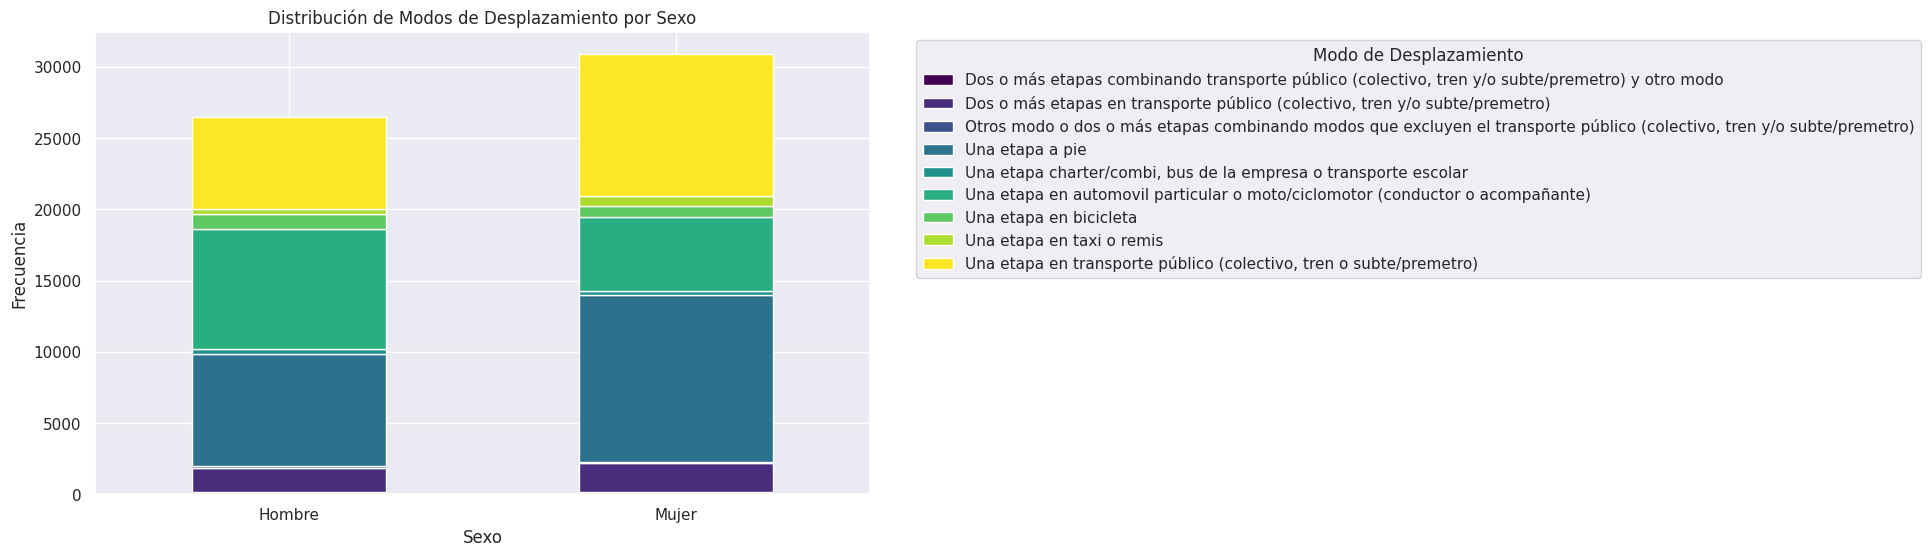

In [ ]:
# @title
tabla_contingencia = pd.crosstab(df_filtrado['Sexo'], df_filtrado['modo_des'])

# Verifica que la tabla de contingencia no esté vacía
if not tabla_contingencia.empty:
    plt.figure(figsize=(12, 8))
    tabla_contingencia.plot(kind='bar', stacked=True, colormap='viridis')

    plt.title('Distribución de Modos de Desplazamiento por Sexo')
    plt.xlabel('Sexo')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    plt.legend(title='Modo de Desplazamiento', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()
else:
    print("La tabla de contingencia está vacía.")

Relación jefe de Hogar segun sexo

<Figure size 1200x800 with 0 Axes>

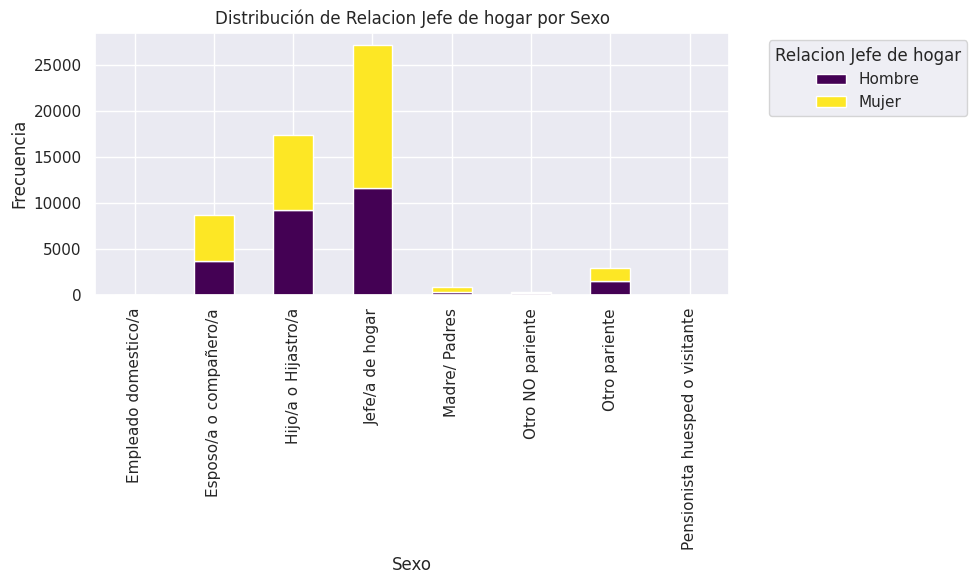

In [ ]:
# @title
tabla_contingencia = pd.crosstab(df_filtrado['Relacion_Jefe_Hogar'], df_filtrado['Sexo'])

# Verifica que la tabla de contingencia no esté vacía
if not tabla_contingencia.empty:
    plt.figure(figsize=(12, 8))
    tabla_contingencia.plot(kind='bar', stacked=True, colormap='viridis')

    plt.title('Distribución de Relacion Jefe de hogar por Sexo')
    plt.xlabel('Sexo')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)
    plt.legend(title='Relacion Jefe de hogar', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()
else:
    print("La tabla de contingencia está vacía.")

Se presenta mayor desplazamiento de los jefes de hogares y la mayoria de los consideradores jefes de hogar son mujeres

# **Analizando los datos faltantes con visualizaciones**

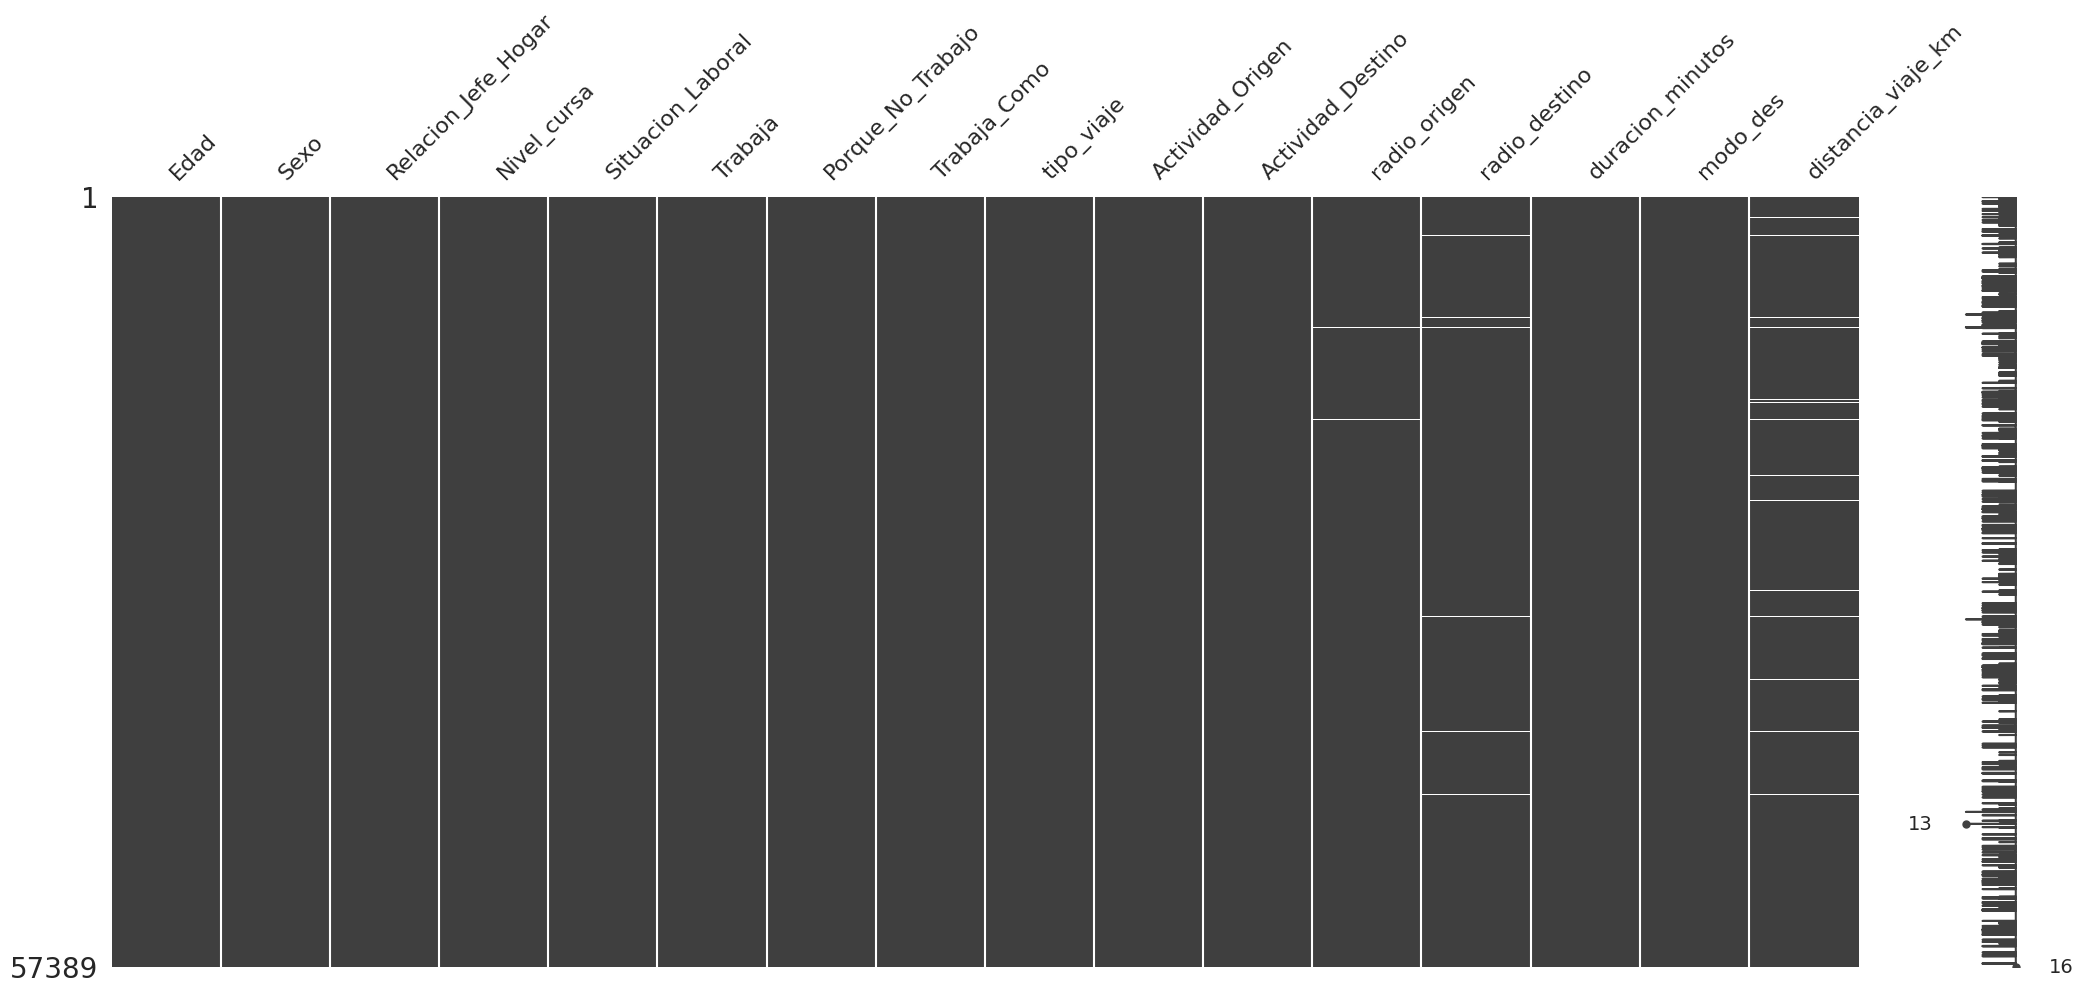

In [ ]:
# @title
# Generar y mostrar una matriz de valores faltantes
msno.matrix(df_filtrado)
plt.show()

Matriz de correlacion de nulos

<Axes: >

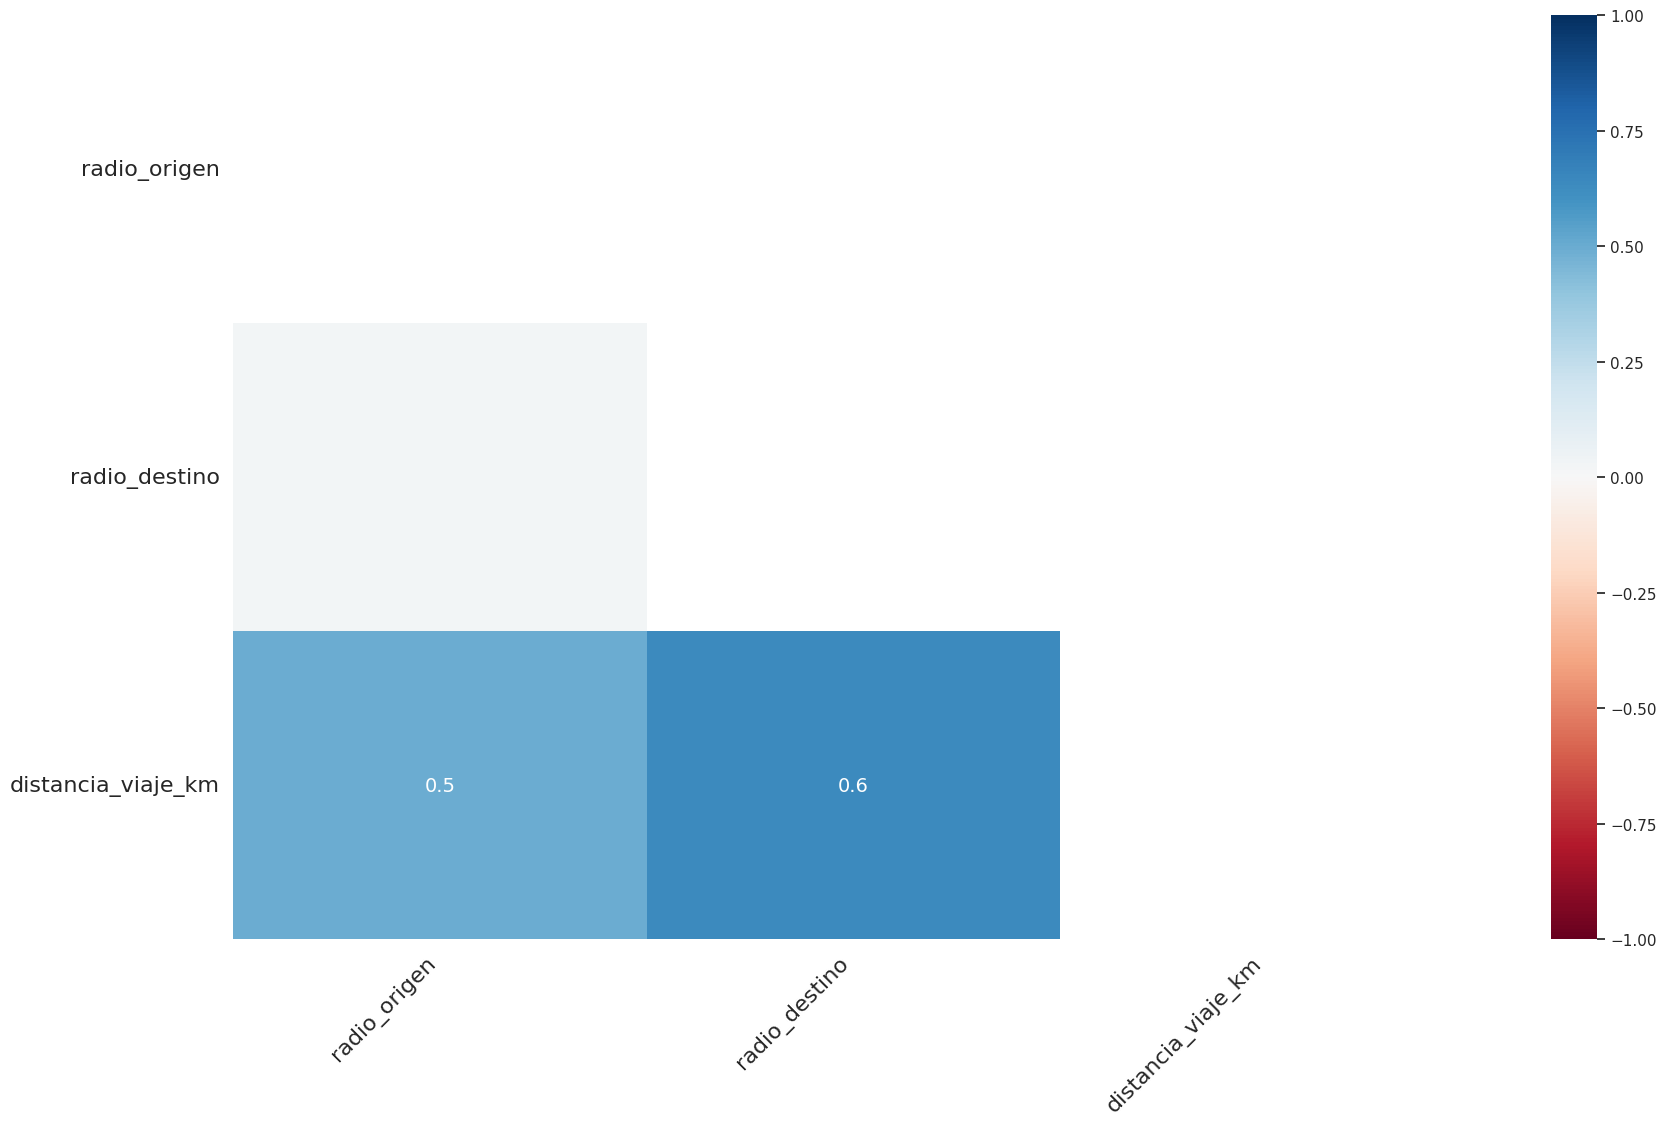

In [ ]:
# @title
msno.heatmap(df_filtrado)

Hay correlacion positiva moderada de nulidad , si una variable tiene datos nulos la otra tambien va. Acá mas informaci´n del tema: https://github.com/ResidentMario/missingno

Dendrograma

<Axes: >

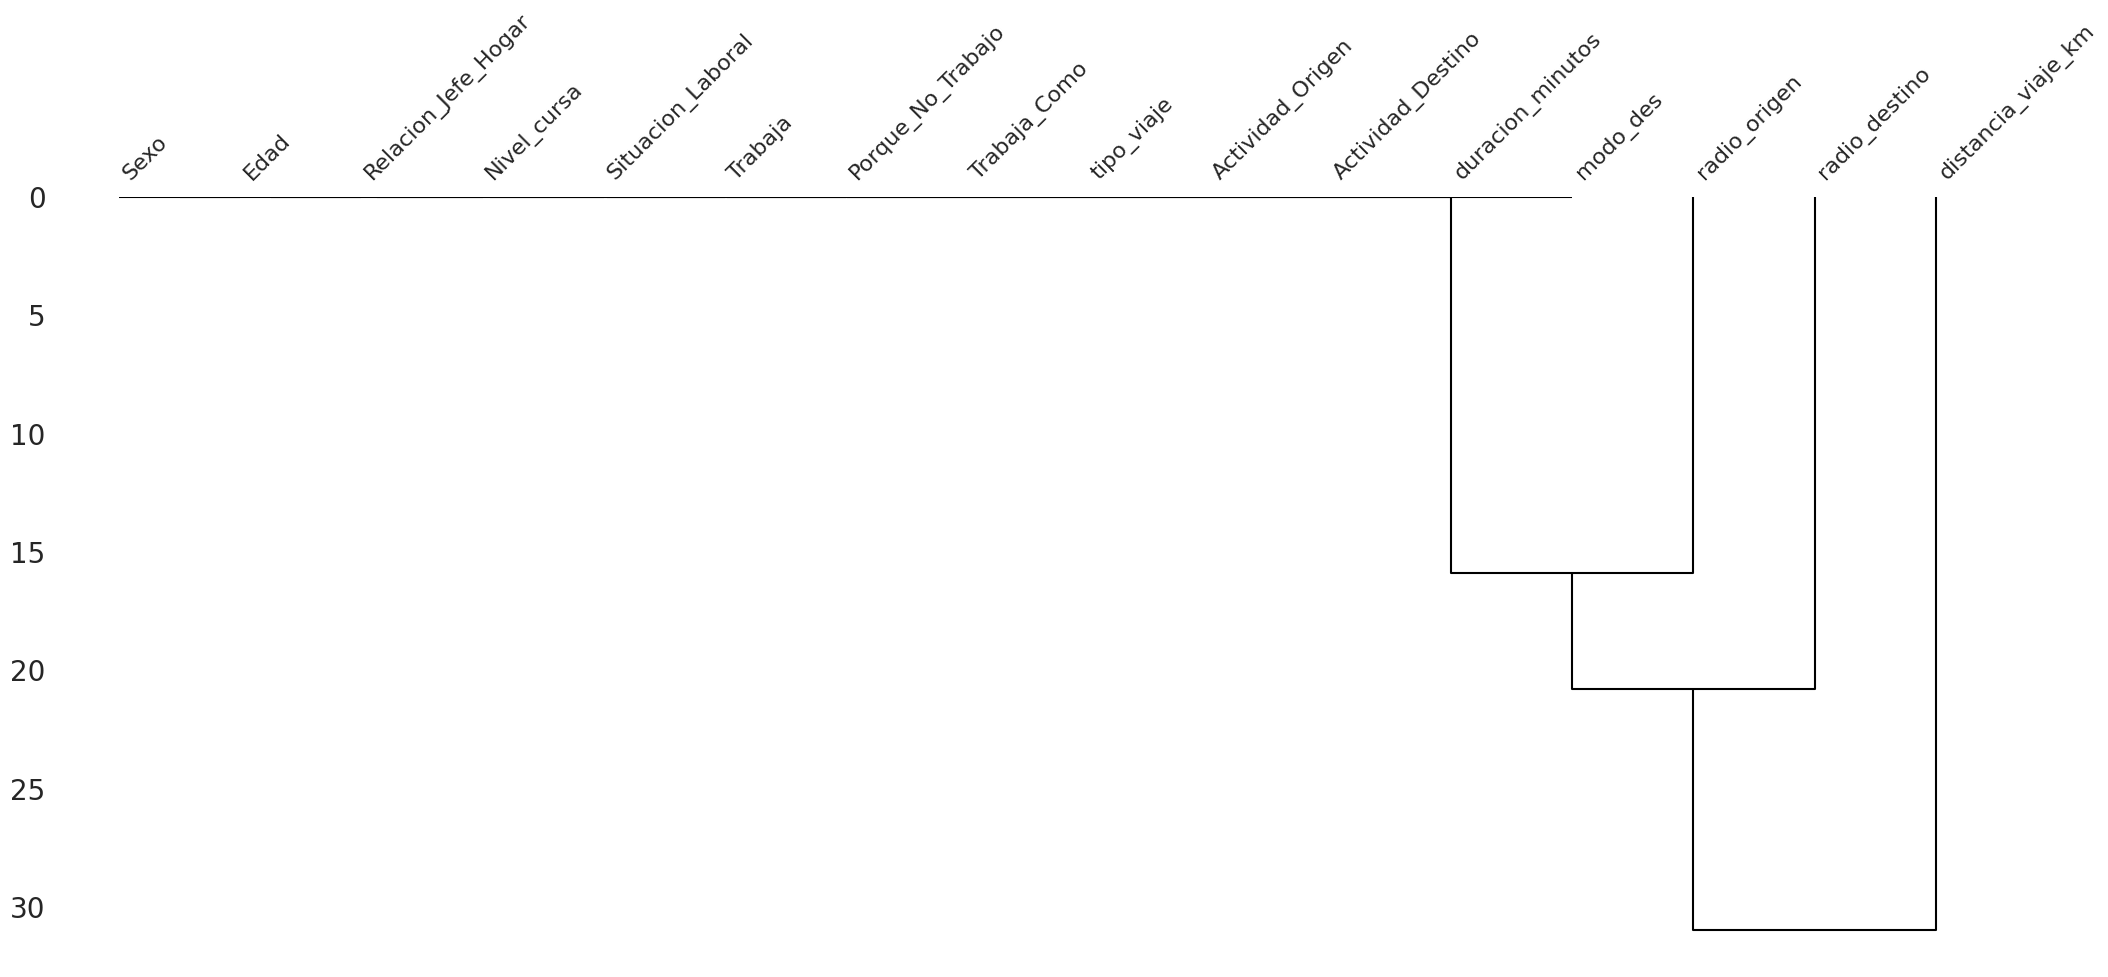

In [ ]:
# @title
msno.dendrogram(df_filtrado)

Para aplicar la técnica de imputación no realizamos el filtrado por rango intercualtilco de la variable distancia_viaje_km, pues no hubieses tenido que imputar.

# Imputación de datos faltantes
La imputación de valores faltantes, se puede usar ya sea **usando la media, mediana, moda o KNN**, y se puede realizar directamente sobre los datos en su escala original.

# Imputación KNN
La imputación k-NN reemplaza los valores faltantes de una muestra utilizando la media (o la mediana) de los valores de características similares encontrados en las muestras más cercanas que tienen valores completos. La similitud entre las muestras se basa en las características que no tienen valores faltantes. El algoritmo encuentra las k muestras más cercanas (vecinos) en el conjunto de datos basado en las características que no son faltantes.
Calcular el valor de imputación como el promedio (o mediana) de los valores de esa característica en las k muestras más cercanas, Y el valor faltante se reemplaza con el valor calculado.
Se imputan faltantes en **radio_origen', 'radio_destino', 'distancia_viaje_km'**
 Link : [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)






In [ ]:
# @title
# Selecciona las columnas que tienen valores faltantes
columns_with_missing = ['radio_origen', 'radio_destino', 'duracion_minutos', 'distancia_viaje_km']

# Crea una copia del DataFrame para aplicar la imputación
df_imputed = df_filtrado.copy()

# Inicializa el KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Puedes ajustar el número de vecinos según tu necesidad

# Aplica imputación solo a las columnas seleccionadas
df_imputed[columns_with_missing] = imputer.fit_transform(df_imputed[columns_with_missing])


# Verifica los valores nulos después de la imputación
print("Valores nulos después de la imputación:")
print(df_imputed.isnull().sum())



Valores nulos después de la imputación:
Edad                   0
Sexo                   0
Relacion_Jefe_Hogar    0
Nivel_cursa            0
Situacion_Laboral      0
Trabaja                0
Porque_No_Trabajo      0
Trabaja_Como           0
tipo_viaje             0
Actividad_Origen       0
Actividad_Destino      0
radio_origen           0
radio_destino          0
duracion_minutos       0
modo_des               0
distancia_viaje_km     0
dtype: int64


# Guardamos dataset imputado

In [ ]:
# @title
# Guardar el DataFrame imputado en formato CSV
df_imputed.to_csv('df_imputado.csv', index=False)

# O guardar el DataFrame imputado en formato Excel
df_imputed.to_excel('df_imputado.xlsx', index=False)

In [ ]:
# @title
# Leer el DataFrame desde el archivo CSV
df_imputed = pd.read_csv('df_imputado.csv')

# Mostrar las columnas del DataFrame
print("Columnas en el DataFrame CSV:")
print(df_imputed.columns)

Columnas en el DataFrame CSV:
Index(['Edad', 'Sexo', 'Relacion_Jefe_Hogar', 'Nivel_cursa',
       'Situacion_Laboral', 'Trabaja', 'Porque_No_Trabajo', 'Trabaja_Como',
       'tipo_viaje', 'Actividad_Origen', 'Actividad_Destino', 'radio_origen',
       'radio_destino', 'duracion_minutos', 'modo_des', 'distancia_viaje_km'],
      dtype='object')


# Preparandonos para evaluar modelos:

*   Algunos algoritmos **regresión lineal o regresión logistica,**  son sensibles a las distintas escalas que puedan presentar las variables. Otros algoritmos como **Árboles de Decisión, Random Forest, Gradient Boosting no** se ven afectados por estas.Tres técnicas distintas para transformar datos, cada una con su propio objetivo y método:

1.  **Estandarización(Standardization):**
Transforma los datos para que tengan una media de 0 y una desviación estándar de 1.

Fórmula: $$z=\frac{X-μ}{σ}$$

Donde:

*   $X$ es el valor original.
*   $𝜇$ es la media de la variable.
*   $σ$ es la desviación estándar de la variable.

Los valores estandarizados (z-scores) tienen una media de 0 y una desviación estándar de 1.
2. **Escalado (Scaling):**
Ajusta los datos para que caigan dentro de un rango específico, comúnmente entre 0 y 1.


Fórmula:$$X_{esc}=\frac{X-X_{min}}{X_{max}-X_{min}}$$


Donde:


*   $X$ es el valor original.
*   $X_{min}$ es el valor mínimo de la variable.
*   $X_{max}$ es el valor máximo de la variable.
*   $X_{escalado}$ el Valor  normalizado.

Resultado: Los valores escalados estarán en el rango $[0,1]$

3. **Normalización(Min-Max Scaling)**
En muchos contextos, normalización se refiere al proceso de ajustar los datos a un rango específico. Esto puede ser igual al escalado en el rango $[0,1]$ , que es similar al escalado.

Fórmula:

$$X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}}$$$


Donde:


*   $X$ es el valor original.
*   $X_{min}$ es el valor mínimo de la variable.
*   $X_{max}$ es el valor máximo de la variable.
*   $X_{norm}$ el Valor  normalizado.
 Normalización también puede referirse a transformar los datos para que sigan una distribución específica.

#**La correlación**

Por defecto, pandas utiliza el coeficiente de Pearson cuando indicas df.corr(). El Coeficiente de Correlación de Pearson mide la fuerza y la dirección de la relación lineal entre dos variables continuas, donde se asume que las variables son continuas y que siguen una distribución normal. Es sensible a la presencia de valores atípicos. Donde valores cercanos a 1 o -1 indican una fuerte relación lineal positiva o negativa, respectivamente. Valores cercanos a 0 indican poca o ninguna relación lineal.

* Una correlación alta entre dos variables independientes (por ejemplo, valores mayores a ±0.8) puede indicar multicolinealidad. Sin embargo, no se suele utilizar un umbral tan alto como ±0.8 para tomar decisiones, ya que la multicolinealidad puede comenzar a ser un problema con valores menores.
* Además de la correlación, el Factor de Inflación de la Varianza (VIF) es una medida común para detectar multicolinealidad. Un VIF mayor a 10 (algunos utilizan un umbral más conservador de 5) sugiere que la variable puede estar colineal con otras variables en el modelo.
* **Desestimar**  una de las variables si se identifica una alta correlación entre dos variables o **combinar** o transformar variables.

## *En un modelo de Regresión*
 Y predecir distancia_viaje_km a partir de variables como Edad, duracion_minutos, radio_destino y radio_origen, la correlación entre las variables independientes (features) y la variable dependiente (target) es crucial.
* Las variables que están altamente correlacionadas con la variable objetivo(distancia_viaje_km) pueden ser buenas predictores. Sin embargo, también debes tener cuidado con la multicolinealidad entre las variables independientes, que puede afectar la interpretación de los coeficientes en la regresión lineal. Por Ejemplo: En la regresión lineal, analizar la correlación entre distancia_viaje_km y las variables independientes puede ayudarte a seleccionar las variables más relevantes y evitar problemas de multicolinealidad.


##*En un modelo de Clasificación*

* En un problema de clasificación, como predecir si alguien trabaja (sí o no), el tipo de variable objetivo es categórica. La correlación entre las variables independientes y la variable objetivo aún es importante para entender qué características influyen en la clasificación.Las features pueden ser categóricas o continuas, la correlación entre estas variables y la variable objetivo puede proporcionar información sobre la relevancia de cada característica. Sin embargo, los modelos de clasificación, como los árboles de decisión y las redes neuronales, pueden manejar relaciones no lineales y complejas entre las características y la variable objetivo, lo que puede hacer que la simple correlación sea menos directa en su interpretación.Evaluar la importancia de cada variable puede implicar técnicas como la importancia de características (feature importance) además de la correlación simple.

# Correlación con el **coeficente de Spearman**

Para las variables que categoricas realizamos un enconding , para poder incluirlas en la correlación de Spearman.
Se realiza encoding a las features categoricas
* **Label Encoding**:asigna un número entero único a cada categoría. Es útil cuando la variable categórica tiene un orden natural (por ejemplo, 'Bajo', 'Medio', 'Alto'). o si tienes una variable Sexo con categorías 'Masculino' y 'Femenino', estas podrían ser codificadas como 0 y 1, respectivamente. Tambien se puede hacer **one-hot encoding**

<ipython-input-43-3588325da380>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Sexo'] = le.fit_transform(df_model['Sexo'])
<ipython-input-43-3588325da380>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Trabaja'] = le.fit_transform(df_model['Trabaja'])
<ipython-input-43-3588325da380>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

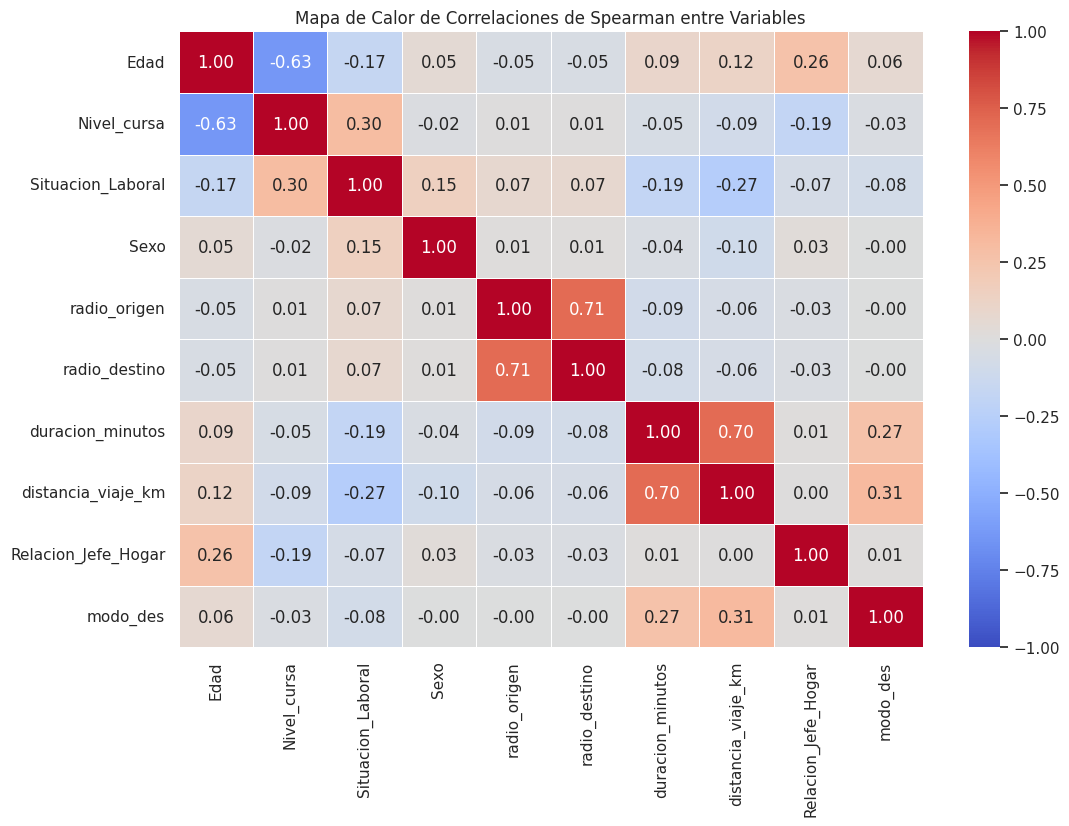

In [ ]:
# @title
#Mapa de correlacion se excluye la variable Trabaja

# Seleccionar las columnas numéricas de interés, incluyendo 'Edad'
columns_priori = ['Edad', 'Nivel_cursa', 'Situacion_Laboral','Trabaja','Sexo','radio_origen', 'radio_destino', 'duracion_minutos', 'distancia_viaje_km','Relacion_Jefe_Hogar','modo_des']

# Filtrar el DataFrame para conservar solo las columnas seleccionadas
df_model= df_imputed[columns_priori]

# Crear un LabelEncoder para codificar las variables categóricas
le = LabelEncoder()

# Codificar las variables categóricas en el DataFrame
df_model['Sexo'] = le.fit_transform(df_model['Sexo'])
df_model['Trabaja'] = le.fit_transform(df_model['Trabaja'])
df_model['Relacion_Jefe_Hogar'] = le.fit_transform(df_model['Relacion_Jefe_Hogar'])
df_model['modo_des'] = le.fit_transform(df_model['modo_des'])


# Excluir la target 'Trabaja' para el cálculo de la matriz de correlación
df_correlation = df_model.drop(columns=['Trabaja'])

# Calcular la matriz de correlación usando el coeficiente de Pearson (por defecto)
corr_matrix = df_correlation.corr(method='spearman')


# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones de Spearman entre Variables')
plt.show()

Las variables que presentan mayor correlacion la cual es negativa es la edad y nivel_cursa de -0.63 y despues una relación de nivel_cursa y situacion laboral de 0.3, así como relacion Jefe de Hogar y edad Vamos a trabajar con las variables nivel_cursa, situacion_laoral, Edad, duración_minutos y distancia_viaje_km. Si lo pensamos con detenimiento tiene sentido estas relaciones?

# Preparamos el dataset para la clasificacion, observamos la columan que se quiere predecir la tarjet 'Trabaja'

<ipython-input-44-3fb4b6b6a866>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Trabaja'] = df_model['Trabaja'].map({1: 'Trabaja', 0: 'No Trabaja'})
<ipython-input-44-3fb4b6b6a866>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_model, x='Trabaja', palette='viridis')


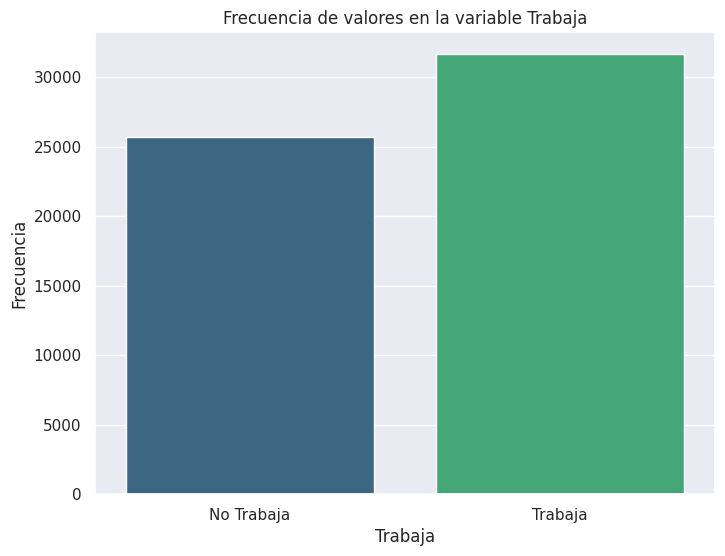

In [ ]:
# @title
# Mapeo de los valores 1 y 0 a etiquetas
df_model['Trabaja'] = df_model['Trabaja'].map({1: 'Trabaja', 0: 'No Trabaja'})

# Creamos la gráfica de barras con seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df_model, x='Trabaja', palette='viridis')
plt.xlabel('Trabaja')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de valores en la variable Trabaja')
plt.show()

No se observa un desbalance de la Target(Trabaja)

Separamos las variables en numericas y categoricas, para realizar encoding o ya ssea escalado o estandarizacion

In [ ]:
# @title
# Separar variables numéricas y categóricas
numerical_cols = ['Edad', 'radio_origen', 'radio_destino', 'duracion_minutos', 'distancia_viaje_km']  # Corregido, eliminando un par de corchetes

categorical_cols = ['Nivel_cursa', 'Situacion_Laboral', 'Trabaja', 'Sexo', 'Relacion_Jefe_Hogar', 'modo_des']

# Crear DataFrames para variables numéricas y categóricas
df_numerical = df_model[numerical_cols]
df_categorical = df_model[categorical_cols]



# Escando las variables numéricas y las variables con encoding
Para Random Forest Clasificador no es estrictamente necesario pero si quiero comparar este resultado con otros modelos todos deben estar en las mismas condiciones como es escalado, pero para otros modelos como de regresión logistica, Support Vector Machines(SVM) si es necesario.

In [ ]:

# Crear el escalador
scaler = StandardScaler()

# Ajustar el escalador en las variables numéricas y transformar
df_numerical_scaled = scaler.fit_transform(df_numerical)

# Convertir el array resultante a un DataFrame
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=numerical_cols)


# Realizar Label Encoding a las Columnas Categóricas y concatenamos con las columnas escaladas.
 El Label Encoding convierte variables categóricas en valores numéricos, de manera que puedan ser utilizadas en algoritmos de aprendizaje automático que requieren datos numéricos como entrada.

In [ ]:

# Lista de columnas categóricas
categorical_cols = ['Nivel_cursa', 'Situacion_Laboral', 'Trabaja', 'Sexo', 'Relacion_Jefe_Hogar', 'modo_des']

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a cada columna categórica
df_categorical_encoded = df_model[categorical_cols].apply(label_encoder.fit_transform)

Concatenamos
La función pd.concat() en pandas se utiliza para concatenar (o combinar) dos o más DataFrames u objetos similares, como Series, en un solo DataFrame. Es muy útil cuando deseas unir diferentes partes de datos, ya sea a lo largo de filas o columnas.




Da las caracteristicas de las variables categoricas , ¿Que es mas conveniente un Label Encoder o One-Hot-Encoder?

In [ ]:
# @title
#Concatenar las variables escaladas y codificadas
df_final = pd.concat([df_numerical_scaled, df_categorical_encoded], axis=1)

# Verificar el DataFrame final
print(df_final.head())

       Edad  radio_origen  radio_destino  duracion_minutos  \
0  1.282841      0.318910       0.317646          0.398206   
1  1.282841      0.318909       0.317646          0.398206   
2 -0.551518      0.318893       0.317607          1.179599   
3 -0.551518      0.318870       0.317629          1.179599   
4  1.047667      0.318870       0.317607         -0.578535   

   distancia_viaje_km  Nivel_cursa  Situacion_Laboral  Trabaja  Sexo  \
0           -0.065049            0                  1        0     0   
1           -0.065049            0                  1        0     0   
2            0.886618            0                  9        1     1   
3            0.886618            0                  9        1     1   
4           -0.467866            0                 10        1     0   

   Relacion_Jefe_Hogar  modo_des  
0                    1         5  
1                    1         5  
2                    3         8  
3                    3         8  
4                  

verificamos la transformacion

## **Dividir  Conjunto de Entrenamiento y Evaluación**

El dataset se debe dividir para evaluar los modelos. Generalmente, se divide en un conjunto de entrenamiento (**data train)** que comprende fracciones de 70% a 80%, y un conjunto de prueba **(data test)** que comprende fracciones de 20% a 30%. Esto depende de la cantidad de datos disponible. De ser necesario ajustar hiperparámetros o prevenir el sobreajuste(overfitting), se puede reservar un conjunto de validación **(data validation)** dentro del conjunto de entrenamiento o utilizar validación cruzada o cross-validation , o sea

* Conjunto de Entrenamiento : 60-70%
*Conjunto de Validación : 15-20%
*Conjunto de Prueba : 15-20%

La validación cruzada ayuda a asegurar que el modelo generalice bien , que no esté sobreajustado a los datos de entrenamiento. Algunos problemas como:

* Overfitting (Sobreajuste) y Underfitting (Subajuste) son dos problemas comunes en el aprendizaje automático y no siempre dependen de la división del dataset.
* **Overfitting**(Sobreajuste): Se presenta cuando el modelo aprende demasiado bien los detalles y el ruido de los datos de entrenamiento, lo que resulta en un buen desempeño en los datos de entrenamiento pero un mal desempeño en datos nuevos. Esto puede deberse a un modelo demasiado complejo o a datos insuficientes o ruidosos.

* **Underfitting** (Subajuste): Ocurre cuando el modelo no aprende lo suficiente de los datos de entrenamiento, resultando en un rendimiento pobre tanto en los datos de entrenamiento como en los datos nuevos. Esto puede deberse a un modelo demasiado simple o a una falta de características relevantes.




1. Dividimos el conjunto de datos en 80% y 20%

In [ ]:
# @title
# Definir la semilla para la reproducibilidad
seed = 42

# Sacamos la target que queremos predecir 'Trabaja'
X = df_final.drop(columns=['Trabaja'])  # Variables de entrada
y = df_final['Trabaja']  # Variable objetivo

# Dividir en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)



### **Evaluando modelos Random Forest Clasificador, Regresión Logistca y Support Vector Classifier**

Como el objetivo es identificar de manera efectiva a las personas que trabajan (es decir, los positivos), nos enfocaremos en las metricas del como el modelo identifica los casos positivos.Es fundamental si se desea minimizar el número de falsos negativos (es decir, casos en los que el modelo no identifica a una persona que realmente trabaja). La matriz de confusión proporciona un resumen de las predicciones del modelo comparadas con los valores verdaderos.Y las métricas como precisión, recall, puntuación F1, y AUC-ROC se obtienen a partir de la matriz de confusión.

              P r e d i c c i ó n
           V     |   0   |   1   |
           e------------------------
           r  0  |  TN   |  FP   |
           d ------------------------
           a  1  |  FN   |  TP   |
           d------------------------

* TN (True Negatives): Número de casos donde la clase real es 0 y el modelo también predice 0.
* FP (False Positives): Número de casos donde la clase real es 0, pero el modelo predice 1.
* FN (False Negatives): Número de casos donde la clase real es 1, pero el modelo predice 0.
* TP (True Positives): Número de casos donde la clase real es 1 y el modelo también predice 1.


**Métricas a partir de la matriz de confusión**

* Recall (Sensibilidad o Tasa de Verdaderos Positivos): mide la tasa de verdaderos positivos correctamente identificados entre todos los positivos reales.
 $$Recall=\frac{TP}{TP+FP}$$



* Precisión (Precision): mide: La proporción de verdaderos positivos entre todos los positivos predichos por el modelo.indica cuántos de los casos que el modelo predice como positivos realmente son positivos.
 $$Precisión=\frac{TP}{TP+FN}$$

* Puntuación F1 (F1 Score):mide la media armónica entre Precisión y Recall, proporcionando un balance entre ambos.cuando se quiere un balance entre precisión y recall y no una métrica sea demasiado alta a expensas de la otra.
 $$F1=2  Χ\frac{Precisión Χ Recall}{Precisión + Recall}$$


2.Entrenando los modelos

In [ ]:
# @title
# Modelo 1: Random Forest
random_model = RandomForestClassifier(random_state=seed)
random_model.fit(X_train, y_train)
rf_train_accuracy = random_model.score(X_train, y_train)
rf_test_accuracy = random_model.score(X_test, y_test)
print(f'Random Forest Train Accuracy: {rf_train_accuracy:.2f}')
print(f'Random Forest Test Accuracy: {rf_test_accuracy:.2f}')

# Modelo 2: Regresión Logística
logist_model = LogisticRegression(random_state=seed, max_iter=1000)  # Añadido max_iter para evitar problemas de convergencia
logist_model.fit(X_train, y_train)
logist_train_accuracy = logist_model.score(X_train, y_train)
logist_test_accuracy = logist_model.score(X_test, y_test)
print(f'Logistic Regression Train Accuracy: {logist_train_accuracy:.2f}')
print(f'Logistic Regression Test Accuracy: {logist_test_accuracy:.2f}')

# Modelo 3: Support Vector Classifier (SVC)
svc_model = SVC(kernel='rbf', random_state=seed)  # Cambia 'rbf' por el kernel que necesites
svc_model.fit(X_train, y_train)
svc_train_accuracy = svc_model.score(X_train, y_train)
svc_test_accuracy = svc_model.score(X_test, y_test)
print(f'SVC Train Accuracy: {svc_train_accuracy:.2f}')
print(f'SVC Test Accuracy: {svc_test_accuracy:.2f}')

Random Forest Train Accuracy: 1.00
Random Forest Test Accuracy: 1.00
Logistic Regression Train Accuracy: 0.97
Logistic Regression Test Accuracy: 0.97
SVC Train Accuracy: 1.00
SVC Test Accuracy: 1.00



Los  modelos de Random Forest y SVC estan presentando una precisión perfecta tanto en el conjunto de entrenamiento como en el de prueba, podría estar sobreajustado. Para ello revisaremos estas matrices de confusión.

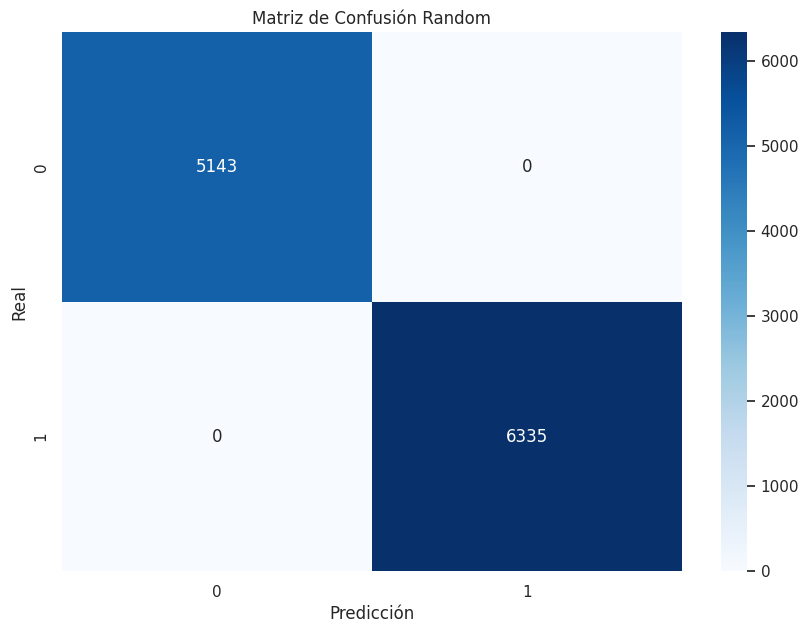

Random Forest Matriz de Confusión:
[[5143    0]
 [   0 6335]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5143
           1       1.00      1.00      1.00      6335

    accuracy                           1.00     11478
   macro avg       1.00      1.00      1.00     11478
weighted avg       1.00      1.00      1.00     11478



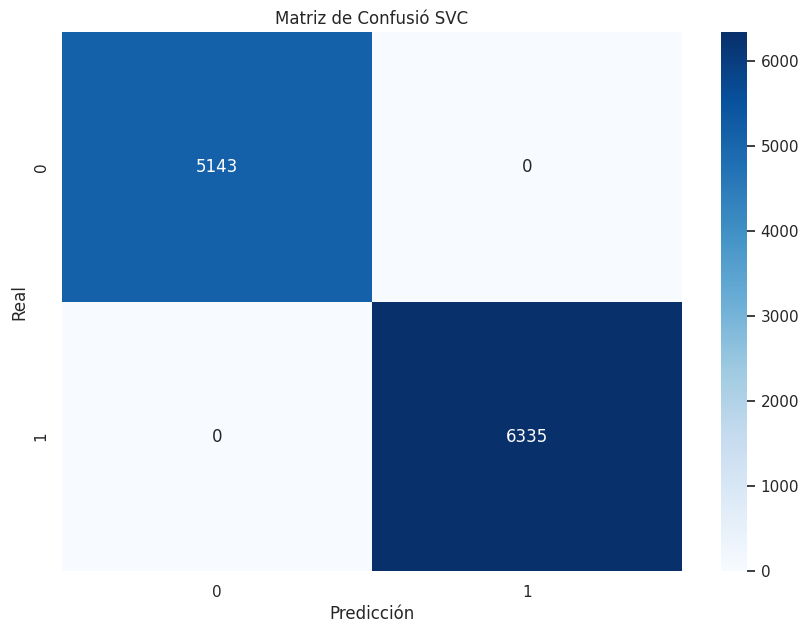

Support Vector Classifier Matriz de Confusión:
[[5143    0]
 [   0 6335]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5143
           1       1.00      1.00      1.00      6335

    accuracy                           1.00     11478
   macro avg       1.00      1.00      1.00     11478
weighted avg       1.00      1.00      1.00     11478



In [ ]:
# @title
#MAtrices de los modelos 1 y 3
# Generar la matriz de confusión y el informe de clasificación para el Random Forest
rf_predictions = random_model.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

# Graficar la matriz de confusión 3
plt.figure(figsize=(10, 7))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión Random')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

print("Random Forest Matriz de Confusión:")
print(rf_conf_matrix)
#print("\nRandom Forest Informe de Clasificación:")
print(rf_class_report)

# Generar la matriz de confusión y el informe de clasificación para el Support Vector Classifier
svc_predictions = svc_model.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predictions)
svc_class_report = classification_report(y_test, svc_predictions)


# Graficar la matriz de confusión 3
plt.figure(figsize=(10, 7))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusió SVC')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

print("Support Vector Classifier Matriz de Confusión:")
print(svc_conf_matrix)
#print("\nSupport Vector Classifier Informe de Clasificación:")
print(svc_class_report)

Conclusiones:

 Modelo Random Forest Clasiffier:
 Interpretación de la Matriz de Confusión:

Los casos Verdaderos Negativos fueron 5143 indicando que el modelo predijo correctamente "No trabaja" cuando en realidad la persona no trabaja.
Los casos Verdaderos positivos fueron 6335 indicando que el modelo predijo correctamente "Trabaja" cuando en realidad la persona trabaja.
De Falsos Negativos 0 , no hay casos donde el modelo predijo "No trabaja" cuando en realidad la persona trabaja.
Y Falsos Positivos tambien 0, donde el modelo predijo "Trabaja" cuando en realidad la persona no trabaja.
El modelo Random Forest en Precision indica ha clasificado todos los ejemplos correctamente. No hay falsos positivos ni falsos negativos, lo que significa que la precisión, el recall y el F1 score son todos perfectos (1.0).

Podemos pensar en posible sobreajuste del modelo.

Esta sucediendo lo mismo con el modelo 3 de SVC , La precisión perfecta de los modelos 1 y 3 ,  podría indicar que el conjunto de datos de prueba es relativamente simple o que los modelos están sobreajustados. Verifica los datos y considera realizar validación cruzada para obtener una evaluación más robusta.

Logistic Regression Train Accuracy: 0.97
Logistic Regression Test Accuracy: 0.97
Matriz de Confusión:
[[5009  134]
 [ 203 6132]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5143
           1       0.98      0.97      0.97      6335

    accuracy                           0.97     11478
   macro avg       0.97      0.97      0.97     11478
weighted avg       0.97      0.97      0.97     11478



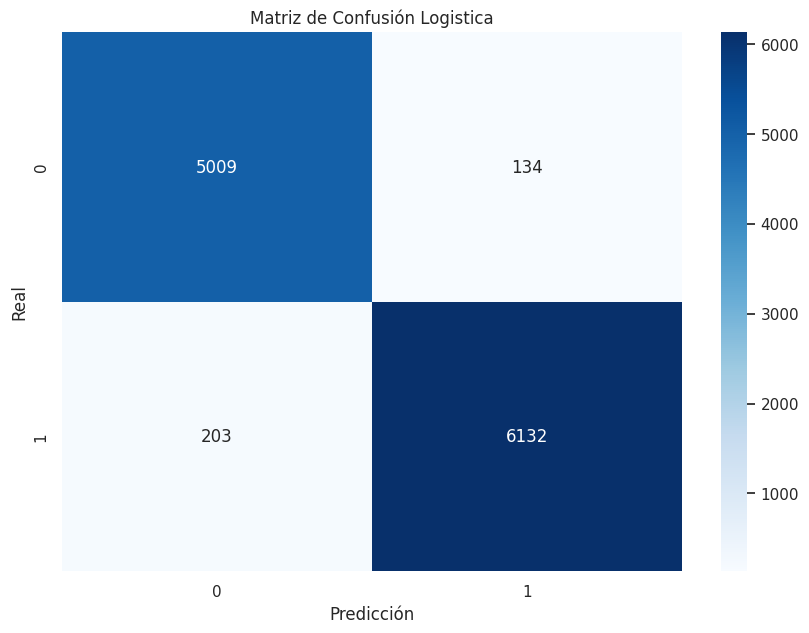

In [ ]:
# @title
# Modelo 2: Regresión Logística
logist_model = LogisticRegression(random_state=seed, max_iter=1000)
logist_model.fit(X_train, y_train)
logist_train_accuracy = logist_model.score(X_train, y_train)
logist_test_accuracy = logist_model.score(X_test, y_test)
print(f'Logistic Regression Train Accuracy: {logist_train_accuracy:.2f}')
print(f'Logistic Regression Test Accuracy: {logist_test_accuracy:.2f}')

# Hacer predicciones en el conjunto de prueba
y_pred = logist_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print('Matriz de Confusión:')
print(conf_matrix)

# También puedes imprimir el informe de clasificación para obtener más métricas
print('\nInforme de Clasificación:')
print(classification_report(y_test, y_pred))

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión Logistica')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Conclusion Modelo 2

El modelo de regresión logística tiene una precisión del 97% tanto en el conjunto de entrenamiento como en el conjunto de prueba. En otras palabras, el 97% de las predicciones del modelo son correctas en ambos conjuntos.e en LA PRECISION(0.96) la proporción de verdaderos positivos sobre todos los positivos predichos para la clase 0,  los casos predichos como clase 0 son realmente clase 0.

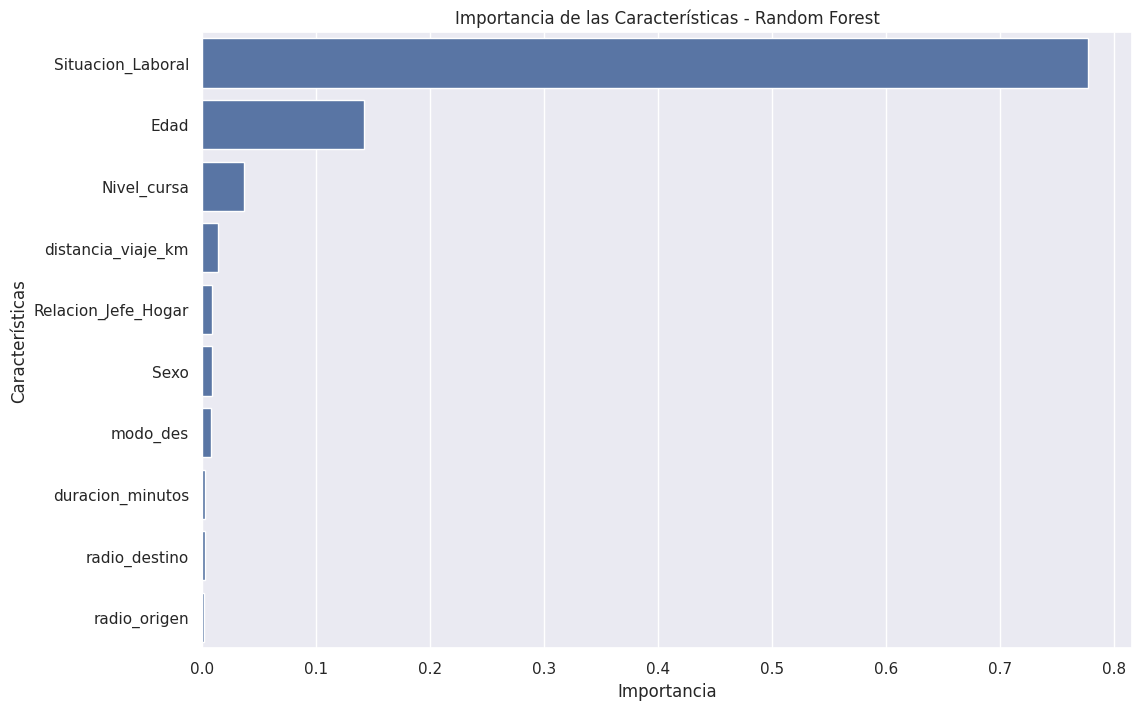

               Feature  Importance
6    Situacion_Laboral    0.776727
0                 Edad    0.141544
5          Nivel_cursa    0.037150
4   distancia_viaje_km    0.013541
8  Relacion_Jefe_Hogar    0.008409
7                 Sexo    0.008321
9             modo_des    0.007576
3     duracion_minutos    0.002801
2        radio_destino    0.002096
1         radio_origen    0.001834


In [ ]:
# Calcular la importancia de las características
importances = random_model.feature_importances_

# Obtener los nombres de las características
feature_names = X_train.columns

# Crear un DataFrame para organizar las importancias
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordenar las características por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importancia de las Características - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# Mostrar el DataFrame de importancias
print(feature_importance_df)

### Conclusiones a partir de los resultados de los 3 modelos

                Modelo  Train Recall  Test Recall  Train Precision  \
0        Random Forest      1.000000     1.000000         1.000000   
1  Regresión Logística      0.970617     0.970639         0.970722   
2                  SVC      0.999956     1.000000         0.999956   

   Test Precision  Train F1 Score  Test F1 Score  
0        1.000000        1.000000       1.000000  
1        0.970745        0.970634       0.970657  
2        1.000000        0.999956       1.000000  


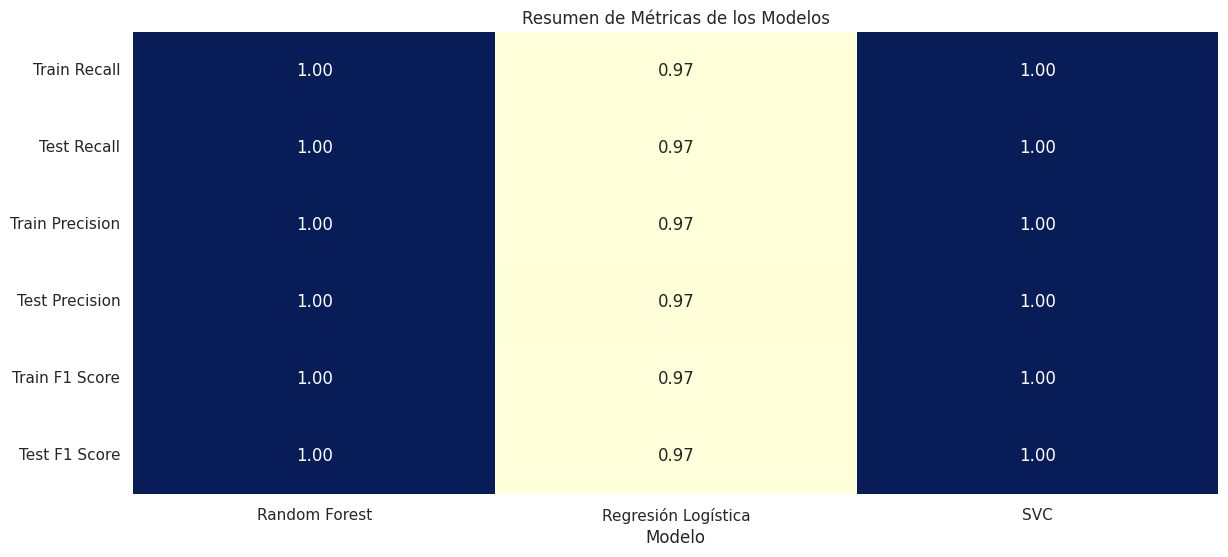

In [ ]:
# Función para calcular métricas y crear el DataFrame
def calculate_metrics(model, X_train, X_test, y_train, y_test):
    # Obtener predicciones
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Calcular métricas
    metrics = {
        'Train Recall': recall_score(y_train, train_preds, average='weighted'),
        'Test Recall': recall_score(y_test, test_preds, average='weighted'),
        'Train Precision': precision_score(y_train, train_preds, average='weighted'),
        'Test Precision': precision_score(y_test, test_preds, average='weighted'),
        'Train F1 Score': f1_score(y_train, train_preds, average='weighted'),
        'Test F1 Score': f1_score(y_test, test_preds, average='weighted')
    }

    return metrics

# Modelo 1: Random Forest
random_model = RandomForestClassifier(random_state=seed)
random_model.fit(X_train, y_train)
rf_metrics = calculate_metrics(random_model, X_train, X_test, y_train, y_test)

# Modelo 2: Regresión Logística
logist_model = LogisticRegression(random_state=seed, max_iter=1000)
logist_model.fit(X_train, y_train)
logist_metrics = calculate_metrics(logist_model, X_train, X_test, y_train, y_test)

# Modelo 3: Support Vector Classifier (SVC)
svc_model = SVC(kernel='rbf', random_state=seed)
svc_model.fit(X_train, y_train)
svc_metrics = calculate_metrics(svc_model, X_train, X_test, y_train, y_test)

# Crear un diccionario con los resultados de las métricas de los modelos
model_results = {
    'Modelo': ['Random Forest', 'Regresión Logística', 'SVC'],
    'Train Recall': [rf_metrics['Train Recall'], logist_metrics['Train Recall'], svc_metrics['Train Recall']],
    'Test Recall': [rf_metrics['Test Recall'], logist_metrics['Test Recall'], svc_metrics['Test Recall']],
    'Train Precision': [rf_metrics['Train Precision'], logist_metrics['Train Precision'], svc_metrics['Train Precision']],
    'Test Precision': [rf_metrics['Test Precision'], logist_metrics['Test Precision'], svc_metrics['Test Precision']],
    'Train F1 Score': [rf_metrics['Train F1 Score'], logist_metrics['Train F1 Score'], svc_metrics['Train F1 Score']],
    'Test F1 Score': [rf_metrics['Test F1 Score'], logist_metrics['Test F1 Score'], svc_metrics['Test F1 Score']]
}

# Convertir el diccionario en un DataFrame
results_df = pd.DataFrame(model_results)

# Mostrar la tabla con las métricas
print(results_df)

# Visualizar la tabla de forma más agradable en un Jupyter Notebook:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.heatmap(results_df.set_index('Modelo').T, annot=True, cmap="YlGnBu", cbar=False, fmt=".2f")
plt.title('Resumen de Métricas de los Modelos')
plt.show()

Se observa  que los  modelos Random y SVC tiene un rendimiento perfecto (precisión, recall, y f1-score de 1.0) tanto en el conjunto de entrenamiento como en el de prueba, lo cual es inusual y puede indicar que el modelo está sobreajustado (overfitting) o que hay algún problema en el proceso de modelado. Ahora conociendo las features mas relevantes y antes descriptas podemos evaluar nuevamente con estas y ver si el modelo mejora.